<a href="https://colab.research.google.com/github/CristaldoWeint/M71V-M72V_06-M-todos-de-An-lisis-Multivariado---C09-2024/blob/main/CRISTALDO_Multivariado_TFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

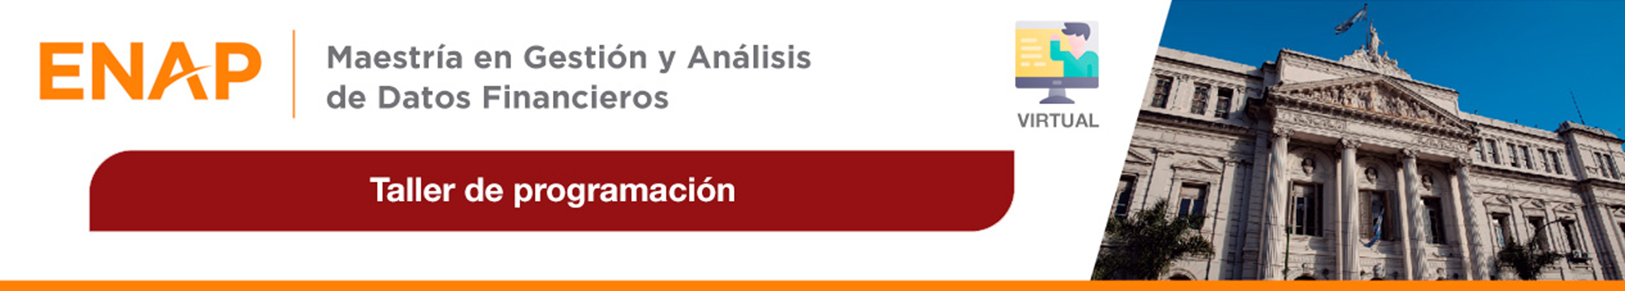

M71V MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS
# M71V/M72V_06 Métodos de Análisis Multivariado

## TRABAJO FINAL

Profesora: Blanca Vitale

Alumno: **CRISTALDO VALENZUELA, MAURICIO EMANUEL**

#OBTENCION DE INFORMACIÓN

In [ ]:
#1. Mediante conexión a la API de Kaggle con Python:importe el archivo de datos “200+ Financial Indicators of US stocks (2014-2018)”.
!pip install kaggle
import pandas as pd #Importamos la librería pandas para utlizar la función que lee .csv (o .xlsx o .txt, etc)

# Configuración de la API de Kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset el archivo
dataset = "mauriciocristaldo/eepp-e-indicadores-seguros-argentina-2024-06"
file = "indicadores_sinensup_202406.csv"
!kaggle datasets download -d {dataset} -f {file}



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mauriciocristaldo/eepp-e-indicadores-seguros-argentina-2024-06
License(s): DbCL-1.0
100% 169k/169k [00:00<00:00, 322kB/s]
100% 169k/169k [00:00<00:00, 321kB/s]


In [ ]:
df_original = pd.read_csv('/content/indicadores_sinensup_202406.csv', sep=';') #/content/indicadores_sinensup_202406.csv

In [ ]:
df_original.head()

,Entidad N,Entidad NJ,Entidad Denominacion,SEGMENTO,Rank,TOP,ACTIVO - Disponibilidades,ACTIVO - Inversiones,ACTIVO - Creditos,ACTIVO - Inmuebles,...,RESULTADO FINANCIERO - Resultados porTenencia,RESULTADO FINANCIERO - OtrosIngresos,RESULTADO FINANCIERO - OtrosEgresos,RESULTADO FINANCIERO - Gastos deExplotacion yOtros Cargos,RESULTADO FINANCIERO - RECPAM,RESULTADO FINANCIERO - TOTAL,RESULTADO FINANCIERO - ResultadoOperacionesOrdinarias,RESULTADO FINANCIERO - Resultado OperacionesExtraordinarias,RESULTADO FINANCIERO - Impuestoa lasGanancias,RESULTADO FINANCIERO - RESULTADODELEJERCICIO
0,1,A,AFIANZADORA,PM,92,RESTO,7.534390e+04,4.418959e+06,2.538016e+06,0.000000e+00,...,0.000000e+00,0.000,-286023.633,-1441457.503,-3.062344e+06,-2.099534e+06,3.586780e+05,0.0,-2.354916e+05,1.231864e+05
1,2,C,AGROSALTA,PM,113,RESTO,2.256459e+06,6.147431e+07,1.358144e+07,1.764929e+07,...,4.415820e+07,0.000,-837382.362,-330014.242,-6.548793e+07,-1.891490e+07,-1.526299e+07,0.0,0.000000e+00,-1.526299e+07
2,3,A,ALBA,PM,121,RESTO,1.207561e+05,3.055744e+06,9.179537e+05,2.597781e+05,...,3.690407e+06,-1.119,-936868.376,-2514450.999,-2.484058e+06,2.411046e+05,4.484604e+05,0.0,-4.229918e+04,4.061612e+05
3,4,A,ALLIANZ,PM,11,20,1.387707e+07,2.869870e+08,1.256212e+08,7.954588e+06,...,3.352328e+08,357754.610,0.000,-4917388.283,-5.209753e+08,-6.041762e+07,-3.653974e+07,0.0,1.045464e+07,-2.608509e+07
4,5,A,ANTaRTIDA,PM,123,RESTO,1.887429e+05,3.332890e+05,1.188759e+06,8.732468e+06,...,5.113801e+04,-148.153,0.000,-1325125.271,1.112795e+06,9.100645e+05,2.278367e+06,0.0,0.000000e+00,2.278367e+06


In [ ]:
import pandas as pd

print(df_original.dtypes)

Entidad N                                                        int64
Entidad NJ                                                      object
Entidad Denominacion                                            object
SEGMENTO                                                        object
Rank                                                             int64
                                                                ...   
RESULTADO FINANCIERO - TOTAL                                   float64
RESULTADO FINANCIERO - ResultadoOperacionesOrdinarias          float64
RESULTADO FINANCIERO - Resultado OperacionesExtraordinarias    float64
RESULTADO FINANCIERO - Impuestoa lasGanancias                  float64
RESULTADO FINANCIERO - RESULTADODELEJERCICIO                   float64
Length: 87, dtype: object


In [ ]:
df_corr = df_original.iloc[:, 6:]
df_corr.head()

,ACTIVO - Disponibilidades,ACTIVO - Inversiones,ACTIVO - Creditos,ACTIVO - Inmuebles,ACTIVO - Bienes de Uso,ACTIVO - Otros,ACTIVO - TOTAL,PASIVO - Deudas c/Asegurados,PASIVO - Otras Deudas,PASIVO - Compromisos Tecnicos,...,RESULTADO FINANCIERO - Resultados porTenencia,RESULTADO FINANCIERO - OtrosIngresos,RESULTADO FINANCIERO - OtrosEgresos,RESULTADO FINANCIERO - Gastos deExplotacion yOtros Cargos,RESULTADO FINANCIERO - RECPAM,RESULTADO FINANCIERO - TOTAL,RESULTADO FINANCIERO - ResultadoOperacionesOrdinarias,RESULTADO FINANCIERO - Resultado OperacionesExtraordinarias,RESULTADO FINANCIERO - Impuestoa lasGanancias,RESULTADO FINANCIERO - RESULTADODELEJERCICIO
0,7.534390e+04,4.418959e+06,2.538016e+06,0.000000e+00,2.805741e+05,487.618,7.313381e+06,5.479394e+05,3.058200e+06,1.339325e+06,...,0.000000e+00,0.000,-286023.633,-1441457.503,-3.062344e+06,-2.099534e+06,3.586780e+05,0.0,-2.354916e+05,1.231864e+05
1,2.256459e+06,6.147431e+07,1.358144e+07,1.764929e+07,6.439812e+06,0.000,1.014013e+08,1.792510e+07,3.025772e+06,2.683422e+06,...,4.415820e+07,0.000,-837382.362,-330014.242,-6.548793e+07,-1.891490e+07,-1.526299e+07,0.0,0.000000e+00,-1.526299e+07
2,1.207561e+05,3.055744e+06,9.179537e+05,2.597781e+05,2.878371e+06,590959.237,7.823562e+06,3.256080e+05,1.893068e+06,7.264428e+05,...,3.690407e+06,-1.119,-936868.376,-2514450.999,-2.484058e+06,2.411046e+05,4.484604e+05,0.0,-4.229918e+04,4.061612e+05
3,1.387707e+07,2.869870e+08,1.256212e+08,7.954588e+06,2.982617e+07,4199252.894,4.684653e+08,1.368835e+08,6.348320e+07,4.630491e+07,...,3.352328e+08,357754.610,0.000,-4917388.283,-5.209753e+08,-6.041762e+07,-3.653974e+07,0.0,1.045464e+07,-2.608509e+07
4,1.887429e+05,3.332890e+05,1.188759e+06,8.732468e+06,1.933008e+06,14865.328,1.239113e+07,4.287364e+06,1.808519e+06,4.140773e+05,...,5.113801e+04,-148.153,0.000,-1325125.271,1.112795e+06,9.100645e+05,2.278367e+06,0.0,0.000000e+00,2.278367e+06


In [ ]:
df_corr.corr()

,ACTIVO - Disponibilidades,ACTIVO - Inversiones,ACTIVO - Creditos,ACTIVO - Inmuebles,ACTIVO - Bienes de Uso,ACTIVO - Otros,ACTIVO - TOTAL,PASIVO - Deudas c/Asegurados,PASIVO - Otras Deudas,PASIVO - Compromisos Tecnicos,...,RESULTADO FINANCIERO - Resultados porTenencia,RESULTADO FINANCIERO - OtrosIngresos,RESULTADO FINANCIERO - OtrosEgresos,RESULTADO FINANCIERO - Gastos deExplotacion yOtros Cargos,RESULTADO FINANCIERO - RECPAM,RESULTADO FINANCIERO - TOTAL,RESULTADO FINANCIERO - ResultadoOperacionesOrdinarias,RESULTADO FINANCIERO - Resultado OperacionesExtraordinarias,RESULTADO FINANCIERO - Impuestoa lasGanancias,RESULTADO FINANCIERO - RESULTADODELEJERCICIO
ACTIVO - Disponibilidades,1.000000,0.614709,0.653570,0.438003,0.449687,0.440943,0.692978,0.614902,0.658810,0.260688,...,0.509934,0.590202,-0.116222,-0.555421,-0.608623,-0.264008,-0.104495,0.000723,-0.169662,-0.206725
ACTIVO - Inversiones,0.614709,1.000000,0.645979,0.254663,0.452991,0.220670,0.968453,0.711540,0.631788,0.685599,...,0.858002,0.529624,-0.406986,-0.609256,-0.951082,-0.486765,0.095063,0.001855,-0.386872,-0.046646
ACTIVO - Creditos,0.653570,0.645979,1.000000,0.491472,0.765871,0.589056,0.802253,0.738435,0.880120,0.145138,...,0.603530,0.349116,-0.128107,-0.763488,-0.720531,-0.284993,-0.256783,0.004282,-0.169877,-0.400864
ACTIVO - Inmuebles,0.438003,0.254663,0.491472,1.000000,0.432653,0.740725,0.410034,0.249363,0.502066,0.225720,...,0.071413,0.371830,0.002658,-0.514538,-0.189559,-0.198018,-0.169189,0.010044,0.020053,-0.206883
ACTIVO - Bienes de Uso,0.449687,0.452991,0.765871,0.432653,1.000000,0.554679,0.615651,0.548429,0.745700,0.079824,...,0.371720,0.194163,-0.054382,-0.484243,-0.472607,-0.190212,-0.315612,0.005451,-0.155701,-0.469676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RESULTADO FINANCIERO - TOTAL,-0.264008,-0.486765,-0.284993,-0.198018,-0.190212,-0.128887,-0.468217,-0.228268,-0.324082,-0.540648,...,-0.393987,-0.257611,0.807455,0.176129,0.478467,1.000000,0.341329,0.000507,-0.266843,0.319199
RESULTADO FINANCIERO - ResultadoOperacionesOrdinarias,-0.104495,0.095063,-0.256783,-0.169189,-0.315612,-0.169426,-0.009937,-0.006388,-0.077130,0.100066,...,0.221069,0.071476,0.108866,0.013371,-0.103177,0.341329,1.000000,0.011516,-0.734422,0.955703
RESULTADO FINANCIERO - Resultado OperacionesExtraordinarias,0.000723,0.001855,0.004282,0.010044,0.005451,0.000368,0.003129,0.001568,0.006846,0.000215,...,0.001535,-0.000930,0.000231,-0.000405,-0.001805,0.000507,0.011516,1.000000,-0.006411,0.012064
RESULTADO FINANCIERO - Impuestoa lasGanancias,-0.169662,-0.386872,-0.169877,0.020053,-0.155701,-0.035885,-0.349527,-0.237253,-0.246334,-0.185059,...,-0.490424,-0.085313,-0.109622,0.259631,0.409426,-0.266843,-0.734422,-0.006411,1.000000,-0.502128


# PCA para variables patrimoniales

In [ ]:
columnas_a_extraer = [6,7,8,9,10,11,13,14,15,16,18]

In [ ]:
df_pca_pat = df_original.iloc[:, columnas_a_extraer].abs()

In [ ]:
df_pca_pat.head()

,ACTIVO - Disponibilidades,ACTIVO - Inversiones,ACTIVO - Creditos,ACTIVO - Inmuebles,ACTIVO - Bienes de Uso,ACTIVO - Otros,PASIVO - Deudas c/Asegurados,PASIVO - Otras Deudas,PASIVO - Compromisos Tecnicos,PASIVO - Previsiones,PATRIMONIO NETO -
0,7.534390e+04,4.418959e+06,2.538016e+06,0.000000e+00,2.805741e+05,487.618,5.479394e+05,3.058200e+06,1.339325e+06,4110.827,2.363805e+06
1,2.256459e+06,6.147431e+07,1.358144e+07,1.764929e+07,6.439812e+06,0.000,1.792510e+07,3.025772e+06,2.683422e+06,43410.417,7.772361e+07
2,1.207561e+05,3.055744e+06,9.179537e+05,2.597781e+05,2.878371e+06,590959.237,3.256080e+05,1.893068e+06,7.264428e+05,758765.282,4.119678e+06
3,1.387707e+07,2.869870e+08,1.256212e+08,7.954588e+06,2.982617e+07,4199252.894,1.368835e+08,6.348320e+07,4.630491e+07,1902365.466,2.198913e+08
4,1.887429e+05,3.332890e+05,1.188759e+06,8.732468e+06,1.933008e+06,14865.328,4.287364e+06,1.808519e+06,4.140773e+05,24026.538,5.857145e+06


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que df_pca_pat es tu DataFrame
X = df_pca_pat.values

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pca = PCA()
principal_components_pat = pca.fit_transform(X_scaled)

In [ ]:
# Explicar la varianza por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.55882442, 0.14911862, 0.11040821, 0.05257093, 0.04649548,
       0.02786974, 0.02006952, 0.01821243, 0.00947242, 0.00695823,
       0.        ])

In [ ]:
principal_components_pat

array([[-1.02596907e+00, -3.04446593e-02, -1.53724455e-01, ...,
        -6.45808101e-02,  5.28602469e-03, -3.76680536e-16],
       [ 2.73398435e-01,  5.67495997e-01,  1.93870756e-01, ...,
         6.55004147e-01, -2.07515518e-01,  3.14121626e-15],
       [-9.72010105e-01,  2.94173858e-02, -1.76182823e-01, ...,
        -9.96145317e-02, -6.97176940e-03, -6.84454513e-16],
       ...,
       [-7.63757023e-01, -2.88705576e-01,  3.10169117e-01, ...,
        -4.31955853e-02, -8.69458979e-02,  7.10876938e-16],
       [-1.09085104e+00,  1.04377119e-02, -1.17120575e-01, ...,
        -1.05505582e-03,  4.06076514e-03, -3.12335199e-16],
       [-1.12224396e+00, -4.20487041e-02, -1.39692516e-01, ...,
        -2.42597359e-02,  2.04034377e-02, -5.10720213e-16]])

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(df_pca_pat.columns))], index=df_pca_pat.columns[0:])
loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ACTIVO - Disponibilidades,0.311870,-0.034913,0.074757,-0.355164,0.692455,-0.421119,0.280036,0.025203,-0.167711,0.073500,0.019202
ACTIVO - Inversiones,0.319740,-0.403667,0.265923,0.042104,-0.044472,0.111658,-0.055301,0.164573,0.166384,-0.215445,0.737322
ACTIVO - Creditos,0.376926,0.039901,-0.162738,0.099611,-0.055120,-0.023465,-0.247725,-0.344712,0.131045,0.769213,0.165178
ACTIVO - Inmuebles,0.234008,0.448205,0.298296,-0.415608,-0.168860,0.431768,0.351954,-0.357849,0.073639,-0.089767,0.047906
ACTIVO - Bienes de Uso,0.315653,0.185432,-0.169472,0.562080,-0.179323,-0.048306,0.600836,0.204249,-0.281350,0.032270,0.062555
ACTIVO - Otros,0.257626,0.491566,0.083209,-0.244757,-0.261634,-0.225867,-0.399988,0.566009,-0.152917,0.013788,0.041993
PASIVO - Deudas c/Asegurados,0.317765,-0.227947,-0.284634,-0.120790,0.217929,0.643417,-0.030758,0.417406,0.062108,0.082640,-0.322675
PASIVO - Otras Deudas,0.361189,0.100164,-0.032767,0.286720,0.206591,0.108255,-0.449652,-0.392935,-0.403344,-0.440160,-0.093898
PASIVO - Compromisos Tecnicos,0.127914,-0.267925,0.785633,0.186346,-0.104789,-0.011961,-0.018458,0.065291,-0.126002,0.221158,-0.423551
PASIVO - Previsiones,0.213076,-0.472547,-0.260956,-0.412476,-0.525635,-0.202146,0.090035,-0.165544,-0.337866,-0.083322,-0.138931


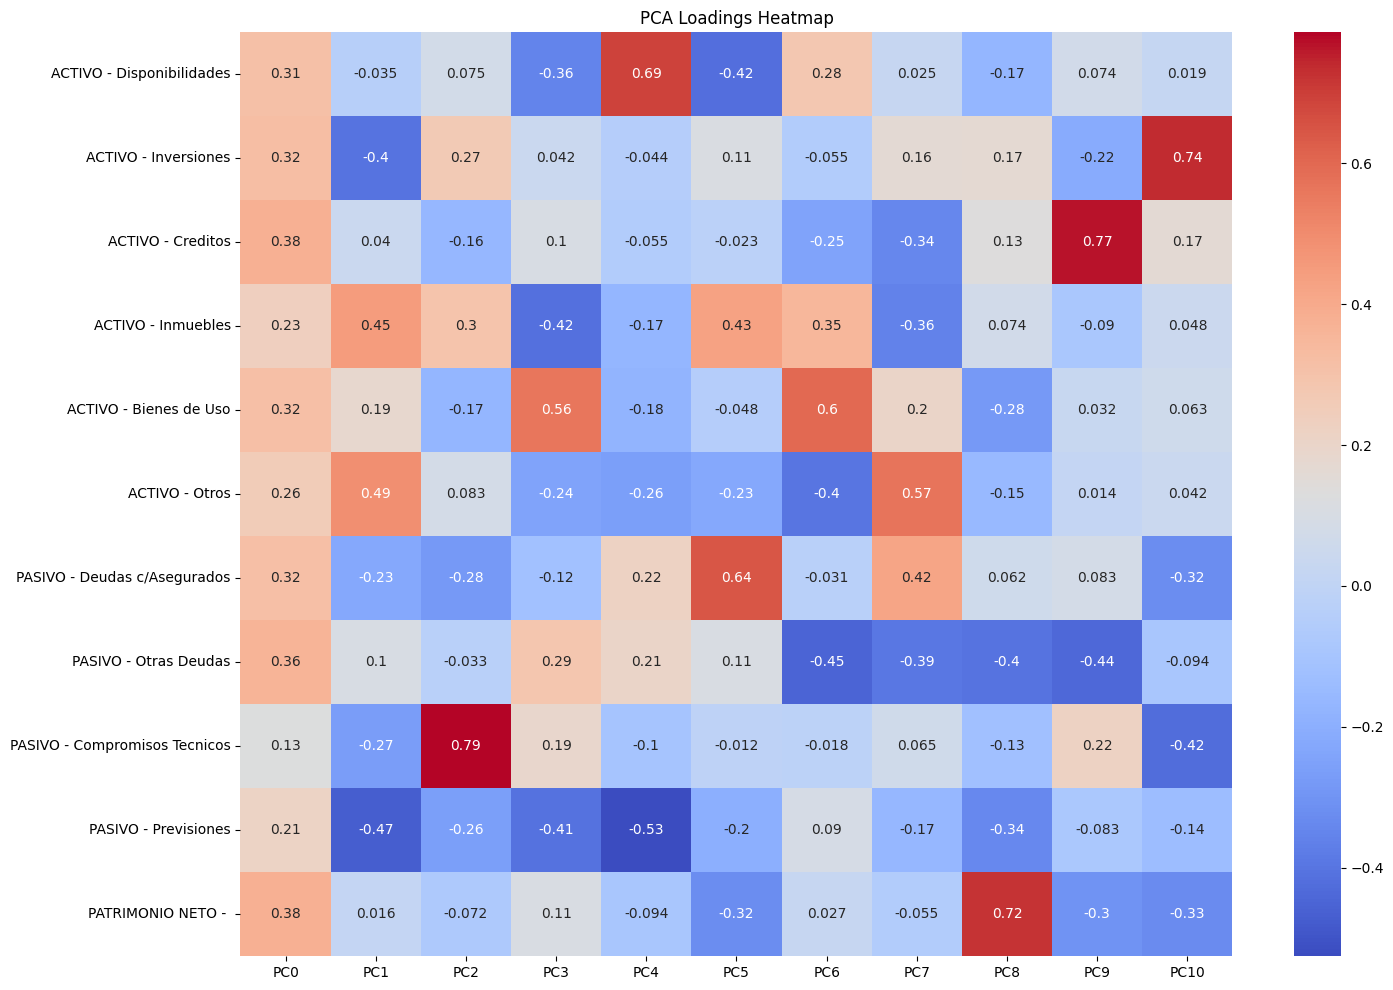

In [ ]:
import seaborn as sns

# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.show()

EL modelo sera PC0, pero si nos interesa que tenga menor deuda con asegurados será PC6 para compañias con baja inversion y baja deuda.

In [ ]:
# umbral para el cual extraer las variables
threshold = 0.3

# Buscar las variables de mayor importancia dentro de cada componente
important_features = {}
for column in loadings.columns:
    important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# obtener el nombre de las variables encoentradas
for pc, features in important_features.items():
    print(f"{pc}: {', '.join(features)}")

PC0: ACTIVO - Disponibilidades, ACTIVO - Inversiones, ACTIVO - Creditos, ACTIVO - Bienes de Uso, PASIVO - Deudas c/Asegurados, PASIVO - Otras Deudas, PATRIMONIO NETO - 
PC1: ACTIVO - Inversiones, ACTIVO - Inmuebles, ACTIVO - Otros, PASIVO - Previsiones
PC2: PASIVO - Compromisos Tecnicos
PC3: ACTIVO - Disponibilidades, ACTIVO - Inmuebles, ACTIVO - Bienes de Uso, PASIVO - Previsiones
PC4: ACTIVO - Disponibilidades, PASIVO - Previsiones
PC5: ACTIVO - Disponibilidades, ACTIVO - Inmuebles, PASIVO - Deudas c/Asegurados, PATRIMONIO NETO - 
PC6: ACTIVO - Inmuebles, ACTIVO - Bienes de Uso, ACTIVO - Otros, PASIVO - Otras Deudas
PC7: ACTIVO - Creditos, ACTIVO - Inmuebles, ACTIVO - Otros, PASIVO - Deudas c/Asegurados, PASIVO - Otras Deudas
PC8: PASIVO - Otras Deudas, PASIVO - Previsiones, PATRIMONIO NETO - 
PC9: ACTIVO - Creditos, PASIVO - Otras Deudas, PATRIMONIO NETO - 
PC10: ACTIVO - Inversiones, PASIVO - Deudas c/Asegurados, PASIVO - Compromisos Tecnicos, PATRIMONIO NETO - 


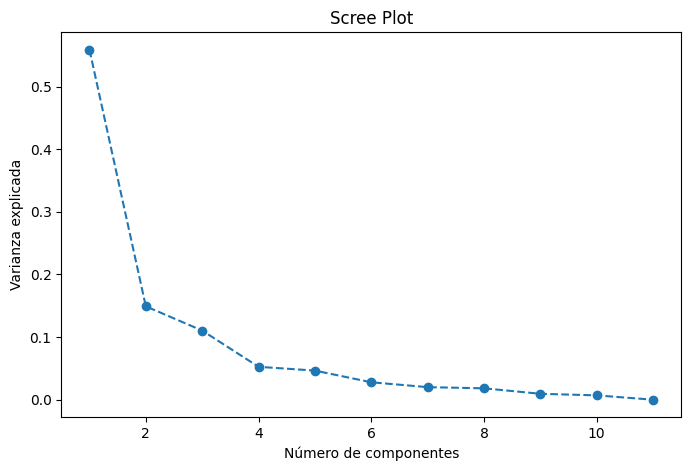

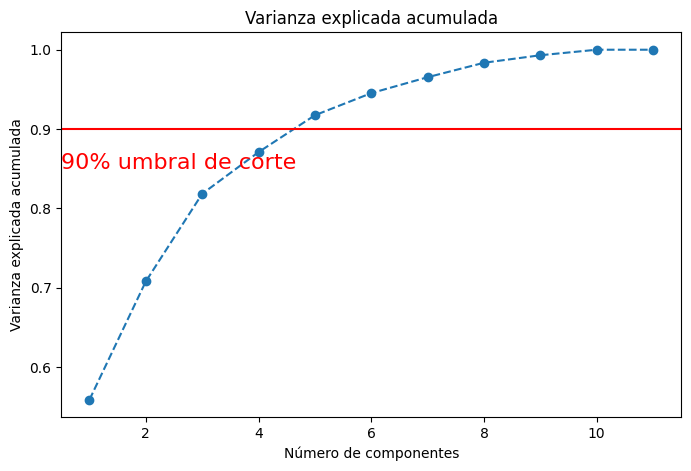

In [ ]:
import numpy as np
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axhline(y=0.9, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, '90% umbral de corte', color = 'red', fontsize=16)
plt.show()

In [ ]:
principal_components_pat = pd.DataFrame(principal_components_pat, columns=[f'PC{i}' for i in range(0, len(df_pca_pat.columns))])
principal_components_pat.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.025969,-0.030445,-0.153724,-0.036993,-0.075051,-0.096660,-0.103219,0.060066,-0.064581,0.005286,-3.766805e-16
1,0.273398,0.567496,0.193871,-0.500282,-0.154257,0.220075,0.762093,-0.401307,0.655004,-0.207516,3.141216e-15
2,-0.972010,0.029417,-0.176183,0.006830,-0.141540,-0.132180,0.026740,0.148739,-0.099615,-0.006972,-6.844545e-16
3,5.219417,-0.009829,-0.563320,0.922806,1.810332,-0.626511,-0.051717,-0.744815,0.484431,0.516605,-7.269050e-16
4,-0.811180,0.330292,0.036191,-0.327779,-0.210100,0.229645,0.277222,-0.144344,0.007053,-0.066821,1.374844e-16


In [ ]:
nombres_variables = df_original.columns[columnas_a_extraer]
nombres_variables_cortos = [nombre[:10] for nombre in df_original.columns[columnas_a_extraer]]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()

# Normalizar los componentes principales
principal_components_pat_norm = scaler.fit_transform(principal_components_pat[['PC0', 'PC1']])

# Normalizar los loadings
loadings_pat_norm = scaler.fit_transform(loadings[['PC0', 'PC1']])

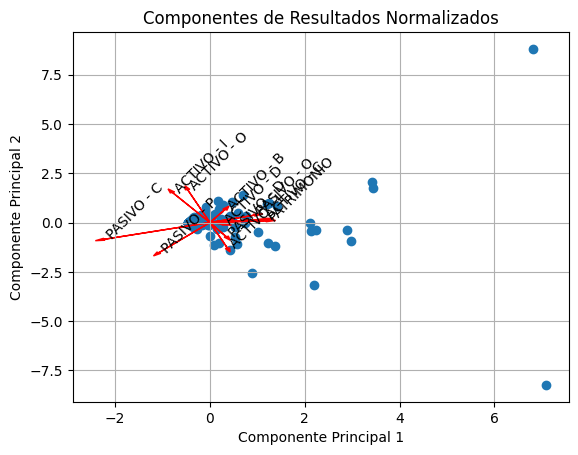

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Crear el gráfico
fig, ax = plt.subplots()

# Agregar las observaciones
ax.scatter(principal_components_pat_norm[:, 0], principal_components_pat_norm[:, 1])

# Agregar las variables normalizadas con flechas
for i, (x, y) in enumerate(zip(loadings_pat_norm[:, 0], loadings_pat_norm[:, 1])):
    ax.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, color='red')
    ax.text(x, y, nombres_variables_cortos[i], rotation=45)


# Personalizar el gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.grid(True)
plt.title('Componentes de Resultados Normalizados')
plt.show()

# PCA para variables resultados


In [ ]:
columnas_a_extraer = [59,60,61,63,64,65,66,70,71,73]

In [ ]:
df_pca_res = df_original.iloc[:, columnas_a_extraer].abs()

In [ ]:
df_pca_res.head()

,Primas Netas Devengadas - PrimasEmitidas,Primas Netas Devengadas - PrimasCedidas,Primas Netas Devengadas - Variacionde RRC,Siniestros Netos Devengados - SiniestrosPagados,Siniestros Netos Devengados - SiniestrosPagados.1,Siniestros Netos Devengados - SiniestrosPagados.2,Siniestros Netos Devengados - SiniestrosPagados.3,Gastos deProduccion,Gastos deExplotacion,Gastos de Produccion y Explotacion - Total
0,1.210745e+07,3.449998e+06,1449492.400,2.468312e+05,2835.232,3.796414e+04,1.864714e+05,3.122619e+06,3.715799e+06,5.168774e+06
1,7.749039e+06,3.938316e+04,626384.665,7.698131e+06,0.000,0.000000e+00,1.670975e+07,9.925046e+06,2.517932e+06,1.244298e+07
2,6.294006e+06,2.491436e+06,192736.530,1.277315e+05,24965.821,4.088212e+04,3.564111e+04,9.610538e+05,3.883366e+06,3.707490e+06
3,3.899410e+08,7.884531e+07,1637220.452,2.134700e+08,2936811.548,5.553205e+07,2.920650e+06,7.340331e+07,7.770062e+07,1.361483e+08
4,6.178499e+06,1.869007e+05,185577.965,3.967586e+06,509.980,9.389366e+05,2.579664e+06,2.239526e+06,2.266662e+06,4.506188e+06


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que df_pca_pat es tu DataFrame
Y = df_pca_res.values

# Estandarizar los datos
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

In [ ]:
#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pca = PCA()
principal_components_res = pca.fit_transform(Y_scaled)

In [ ]:
# Explicar la varianza por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([6.57665544e-01, 1.37864882e-01, 1.01105657e-01, 4.16126012e-02,
       3.22516459e-02, 1.44155216e-02, 1.22616492e-02, 2.40871863e-03,
       3.63170718e-04, 5.06097479e-05])

In [ ]:
principal_components_res

array([[-9.54882303e-01,  4.63383856e-02, -1.50376614e-01, ...,
         1.25298817e-02,  1.08072778e-03, -1.88978153e-02],
       [-6.83769387e-01, -3.74449265e-01, -2.23969787e-01, ...,
        -3.56533813e-01, -4.22313104e-02,  7.78170930e-03],
       [-1.01561034e+00,  2.29857202e-02, -1.93954520e-01, ...,
         1.78362520e-02, -1.72106658e-02, -1.11428891e-02],
       ...,
       [-1.06387604e+00, -1.44484889e-02,  1.38082290e-01, ...,
         2.10229410e-02, -2.07209079e-02,  3.15322687e-03],
       [-1.14396832e+00, -3.33999222e-02, -2.00802777e-01, ...,
         3.32198210e-02, -6.03269360e-03,  2.83391453e-03],
       [-1.14283645e+00, -3.32881130e-02, -1.98381407e-01, ...,
         3.28717071e-02, -6.46698126e-03,  2.85075520e-03]])

In [ ]:
loadings_res = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(df_pca_res.columns))], index=df_pca_res.columns[0:])
loadings_res

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Primas Netas Devengadas - PrimasEmitidas,0.385895,-0.072415,-0.010659,0.086765,-0.093266,-0.083815,0.018703,0.402792,0.811787,-0.029788
Primas Netas Devengadas - PrimasCedidas,0.238361,0.596788,-0.128725,0.401770,-0.001994,-0.461871,0.409346,0.009681,-0.166053,0.021867
Primas Netas Devengadas - Variacionde RRC,0.058928,0.066060,0.969461,0.218203,0.052078,0.037684,-0.006409,0.000302,-0.022855,-0.000408
Siniestros Netos Devengados - SiniestrosPagados,0.364502,-0.253902,-0.068081,0.186992,0.004486,0.207365,-0.041729,0.665995,-0.524139,0.006214
Siniestros Netos Devengados - SiniestrosPagados.1,0.326614,-0.122758,-0.008337,-0.210117,0.890851,-0.062151,0.135950,-0.133577,0.015204,-0.000349
Siniestros Netos Devengados - SiniestrosPagados.2,0.270711,0.550120,-0.116143,0.150368,0.103838,0.533753,-0.516252,-0.147862,0.056114,0.027953
Siniestros Netos Devengados - SiniestrosPagados.3,0.267953,-0.500352,-0.116657,0.618771,-0.092685,0.006326,-0.048010,-0.519900,0.009624,0.006159
Gastos deProduccion,0.363400,0.033268,0.046403,-0.307747,-0.286086,0.418926,0.537403,-0.220680,-0.044048,-0.416157
Gastos deExplotacion,0.365213,-0.012149,0.068529,-0.300400,-0.178609,-0.516247,-0.503763,-0.108993,-0.165394,-0.424397
Gastos de Produccion y Explotacion - Total,0.375147,-0.021490,0.069348,-0.337473,-0.248656,-0.066524,0.020535,-0.153410,-0.073601,0.802793


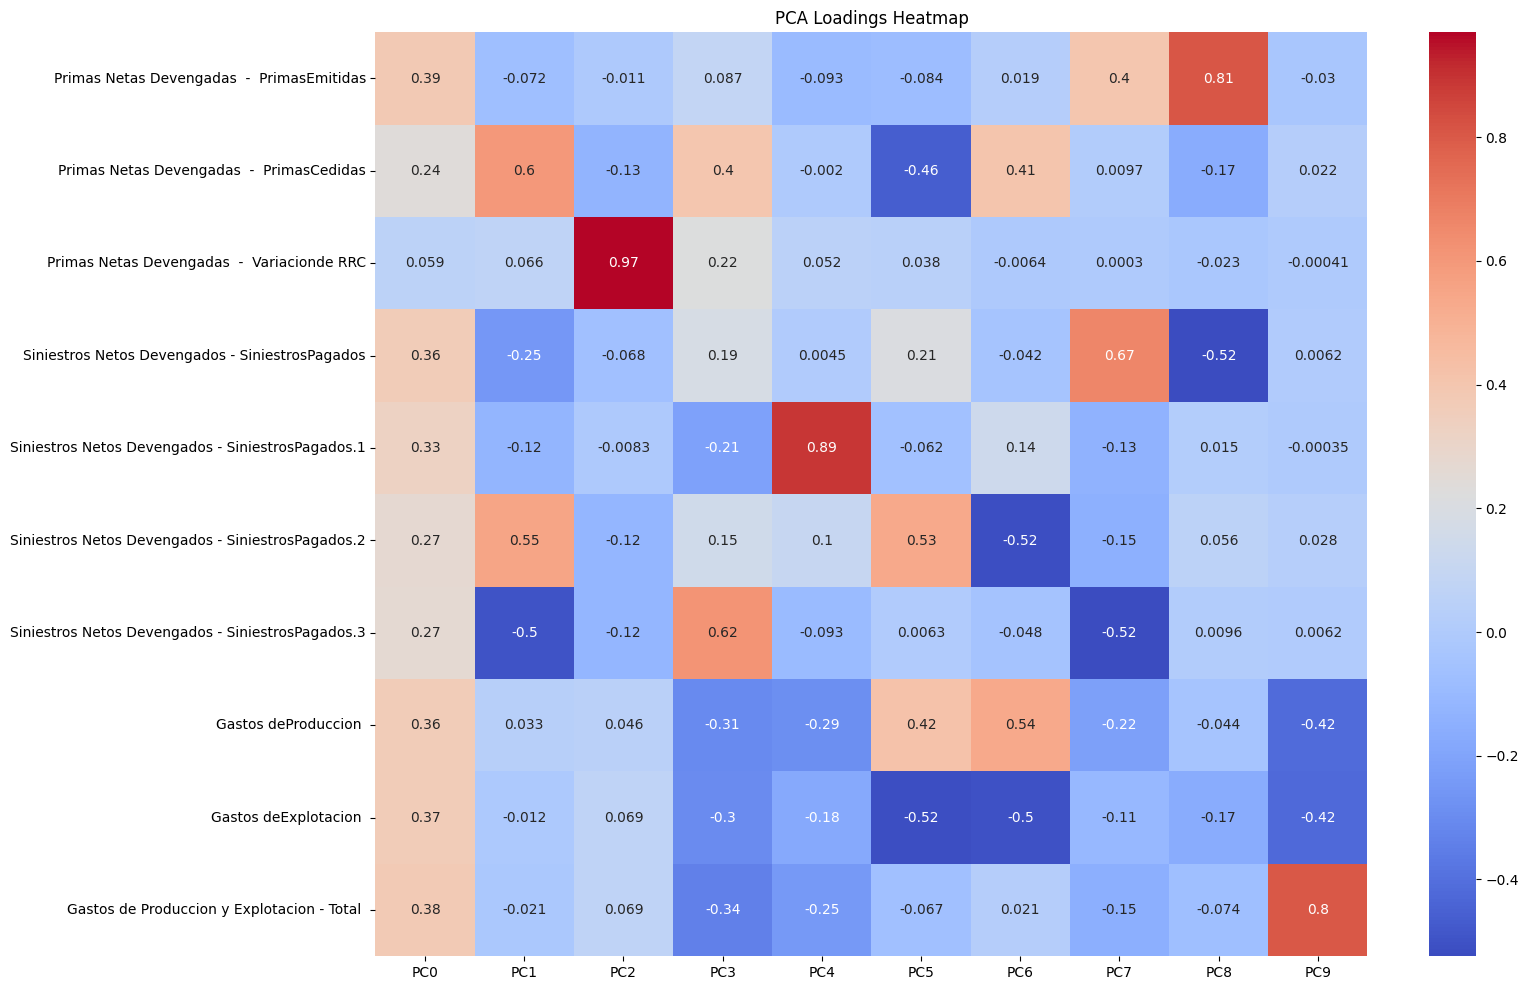

In [ ]:
import seaborn as sns

# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings_res, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.show()

el modelo será PC0, pero nos interesa el que mayor correlacione con ingresos pero menos con siniestros pagados.

In [ ]:
# umbral para el cual extraer las variables
threshold = 0.3

# Buscar las variables de mayor importancia dentro de cada componente
important_features_res = {}
for column in loadings_res.columns:
    important_features_res[column] = loadings_res.index[loadings_res[column].abs() > threshold].tolist()

# obtener el nombre de las variables encoentradas
for pc, features in important_features_res.items():
    print(f"{pc}: {', '.join(features)}")

PC0: Primas Netas Devengadas  -  PrimasEmitidas, Siniestros Netos Devengados - SiniestrosPagados, Siniestros Netos Devengados - SiniestrosPagados.1, Gastos deProduccion , Gastos deExplotacion , Gastos de Produccion y Explotacion - Total 
PC1: Primas Netas Devengadas  -  PrimasCedidas, Siniestros Netos Devengados - SiniestrosPagados.2, Siniestros Netos Devengados - SiniestrosPagados.3
PC2: Primas Netas Devengadas  -  Variacionde RRC
PC3: Primas Netas Devengadas  -  PrimasCedidas, Siniestros Netos Devengados - SiniestrosPagados.3, Gastos deProduccion , Gastos deExplotacion , Gastos de Produccion y Explotacion - Total 
PC4: Siniestros Netos Devengados - SiniestrosPagados.1
PC5: Primas Netas Devengadas  -  PrimasCedidas, Siniestros Netos Devengados - SiniestrosPagados.2, Gastos deProduccion , Gastos deExplotacion 
PC6: Primas Netas Devengadas  -  PrimasCedidas, Siniestros Netos Devengados - SiniestrosPagados.2, Gastos deProduccion , Gastos deExplotacion 
PC7: Primas Netas Devengadas  -  Pr

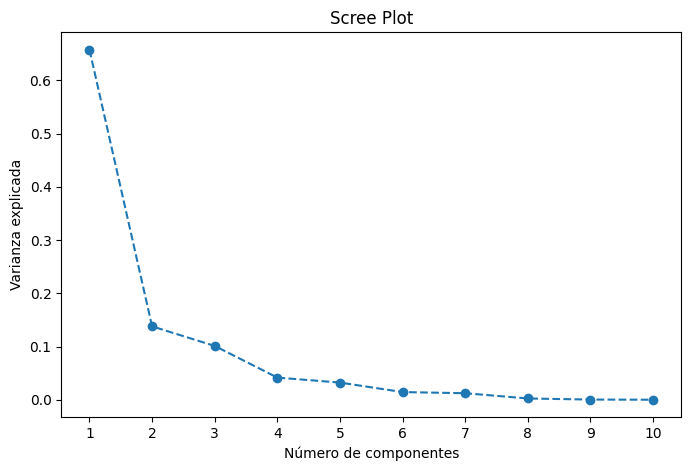

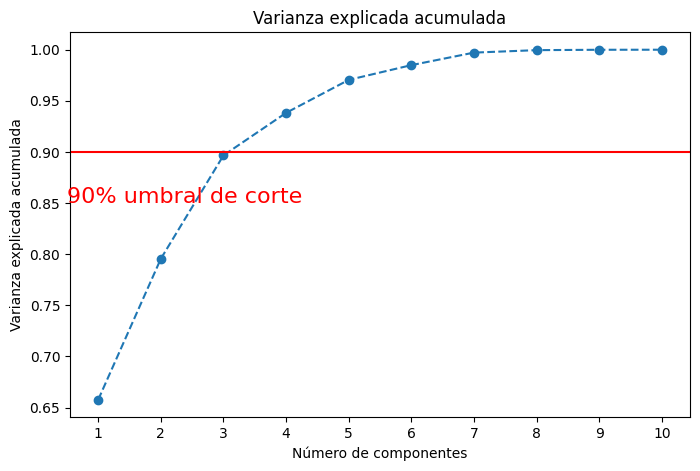

In [ ]:
import numpy as np
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.9, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, '90% umbral de corte', color = 'red', fontsize=16)
plt.show()

In [ ]:
principal_components_res = pd.DataFrame(principal_components_res, columns=[f'PC{i}' for i in range(0, len(df_pca_res.columns))])
principal_components_res.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.954882,0.046338,-0.150377,-0.033626,-0.010150,-0.011004,0.085272,0.012530,0.001081,-0.018898
1,-0.683769,-0.374449,-0.223970,0.209648,-0.162250,0.181513,0.144321,-0.356534,-0.042231,0.007782
2,-1.015610,0.022986,-0.193955,-0.038260,0.026157,-0.024440,0.026785,0.017836,-0.017211,-0.011143
3,5.953206,3.899305,-0.891348,0.131486,-0.403918,1.095208,-1.145935,0.220375,0.068064,-0.025264
4,-0.976901,-0.042405,-0.206585,0.004628,0.011140,0.118577,-0.012233,-0.028467,-0.009576,0.006104


In [ ]:
nombres_variables = df_original.columns[columnas_a_extraer]
nombres_variables_cortos = [nombre[:10] for nombre in df_original.columns[columnas_a_extraer]]


In [ ]:
print(principal_components_pat.dtypes)

PC0     float64
PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8     float64
PC9     float64
PC10    float64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()

# Normalizar los componentes principales
principal_components_res_norm = scaler.fit_transform(principal_components_res[['PC0', 'PC1']])

# Normalizar los loadings
loadings_res_norm = scaler.fit_transform(loadings_res[['PC0', 'PC1']])

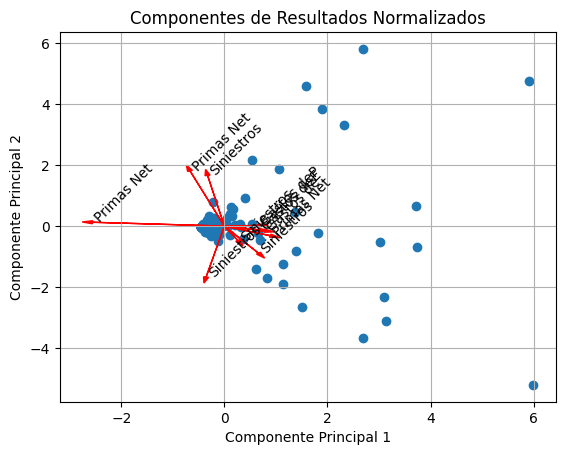

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Crear el gráfico
fig, ax = plt.subplots()

# Agregar las observaciones
ax.scatter(principal_components_res_norm[:, 0], principal_components_res_norm[:, 1])

# Agregar las variables normalizadas con flechas
for i, (x, y) in enumerate(zip(loadings_res_norm[:, 0], loadings_res_norm[:, 1])):
    ax.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, color='red')
    ax.text(x, y, nombres_variables_cortos[i], rotation=45)


# Personalizar el gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.grid(True)
plt.title('Componentes de Resultados Normalizados')
plt.show()

#ANALISIS DE CLUSTERS

### Armado del DF a trabajar

In [ ]:
extraer_orginal = [0,1,3,4,5,19,20]
df_cluster = df_original.iloc[:,extraer_orginal]
#df_cluster['PC0_PAT'] = principal_components_pat["PC0"]
df_cluster['PC6_PAT'] = principal_components_pat["PC6"]
#df_cluster['PC0_RES'] = principal_components_res["PC0"]
df_cluster['PC8_RES'] = principal_components_res["PC8"]
df_cluster.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES
0,1,A,PM,92,RESTO,0.0936,40.0,-0.103219,0.001081
1,2,C,PM,113,RESTO,0.0599,5180.0,0.762093,-0.042231
2,3,A,PM,121,RESTO,0.0487,75.0,0.026740,-0.017211
3,4,A,PM,11,20,3.0154,2879.0,-0.051717,0.068064
4,5,A,PM,123,RESTO,0.0478,2229.0,0.277222,-0.009576


In [ ]:
df_cluster.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES
0,1,A,PM,92,RESTO,0.0936,40.0,-0.103219,0.001081
1,2,C,PM,113,RESTO,0.0599,5180.0,0.762093,-0.042231
2,3,A,PM,121,RESTO,0.0487,75.0,0.026740,-0.017211
3,4,A,PM,11,20,3.0154,2879.0,-0.051717,0.068064
4,5,A,PM,123,RESTO,0.0478,2229.0,0.277222,-0.009576


In [ ]:
print(df_cluster.dtypes)

Entidad N               int64
Entidad NJ             object
SEGMENTO               object
Rank                    int64
TOP                    object
%ProduccionTotal      float64
CantidaddeJuicios     float64
PC6_PAT               float64
PC8_RES               float64
dtype: object


In [ ]:
#e) A las de tipo Object, recategorícelas a categorías numéricas.
cols_object = df_cluster.select_dtypes(include=['object']).columns.tolist() #Contador
for col in cols_object:
    df_cluster[col] = df_cluster[col].astype('category').cat.codes #Recategorización

print(f"Recategorización de columnas de tipo Object a categorías numéricas:\n")
print(f"Número de columnas de tipo Object recategorizadas: {len(cols_object)}")
print(f"Número de columnas numéricas: {df_cluster.select_dtypes(include=['number']).shape[1]}")

Recategorización de columnas de tipo Object a categorías numéricas:

Número de columnas de tipo Object recategorizadas: 3
Número de columnas numéricas: 9


In [ ]:
df_cluster.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576


In [ ]:
df_cluster_escal = df_cluster[['PC6_PAT', 'PC8_RES']].to_numpy()
df_cluster_escal

array([[-1.03218645e-01,  1.08072778e-03],
       [ 7.62092680e-01, -4.22313104e-02],
       [ 2.67403493e-02, -1.72106658e-02],
       [-5.17170653e-02,  6.80643456e-02],
       [ 2.77222445e-01, -9.57633230e-03],
       [ 1.68016950e-01, -1.37076464e-02],
       [-4.97221788e-02, -1.19561747e-02],
       [ 1.79150691e-02, -1.89981735e-02],
       [ 7.54124220e-02, -6.90556090e-03],
       [ 3.98668101e-02, -1.08446091e-02],
       [-3.87182885e-01, -3.41824135e-02],
       [-4.52942236e-02, -2.27814108e-03],
       [ 1.10868480e-01,  3.19469657e-02],
       [-3.16879021e-01, -9.82070906e-02],
       [-4.54470570e-02, -7.45491446e-03],
       [-9.16643717e-02,  7.12980041e-02],
       [ 1.61763560e+00, -1.98161322e-01],
       [-8.78835436e-02,  1.12198481e-02],
       [-3.87762749e-02,  1.84011388e-02],
       [ 2.41550641e-01,  5.22066520e-02],
       [ 1.81998848e+00, -1.44674119e-01],
       [ 1.54092107e-01, -3.57783471e-03],
       [ 2.06910252e-01, -2.43037045e-03],
       [-1.

## Selección óptima de Cluster

### Análisis Jerárquico

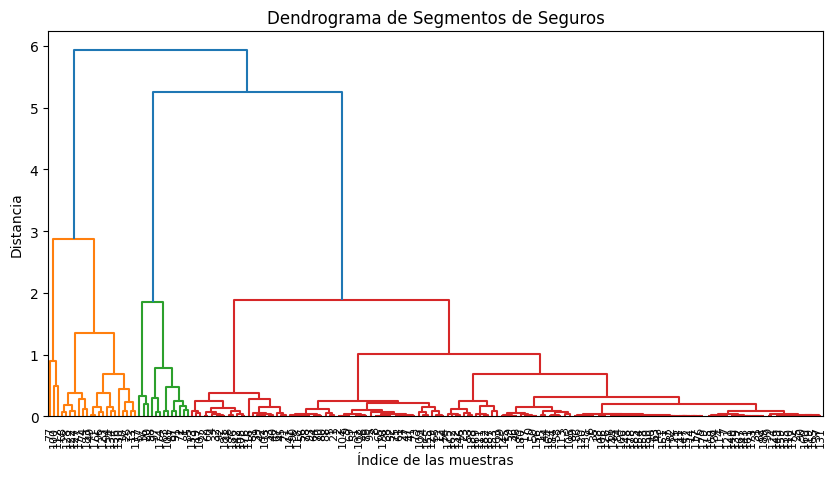

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Seleccionamos las columnas numéricas (componentes principales)
X = df_cluster_escal  # Reemplaza 'CP1', 'CP2', etc. con los nombres reales

# Realizamos el clustering jerárquico utilizando el método de Ward
Z = linkage(X, 'ward')

# Visualizamos el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.title('Dendrograma de Segmentos de Seguros')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

In [ ]:
df_cluster.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576


In [ ]:
df_cluster ['cat_comb'] = df_cluster['Entidad NJ'].astype(str) + '_' +  df_cluster['SEGMENTO'].astype(str)+ '_' +  df_cluster['TOP'].astype(str)

Text(0, 0.5, 'Distancia')

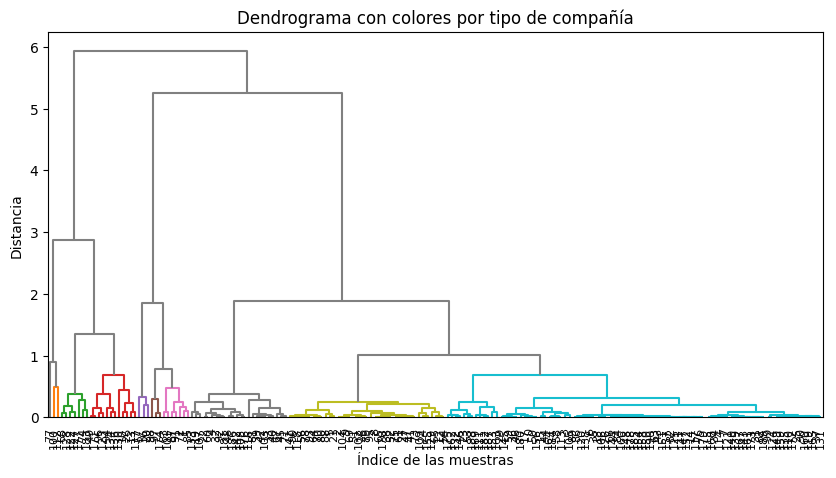

In [ ]:
# Codificar la variable "tipo_compañia"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cluster['cat_comb'] = le.fit_transform(df_cluster['cat_comb'])

# Crear un nuevo DataFrame con las variables numéricas y la codificada
X_encoded = df_cluster[['PC6_PAT', 'PC8_RES', 'cat_comb']]

# Asignar colores a las hojas del dendrograma según la categoría
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,
           color_threshold=0.7,  #
           above_threshold_color='grey')
plt.title('Dendrograma con colores por tipo de compañía')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')

### Método del codo

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np


def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += np.sum((points[i] - curr_center) ** 2)

        sse.append(curr_sse)
    return sse


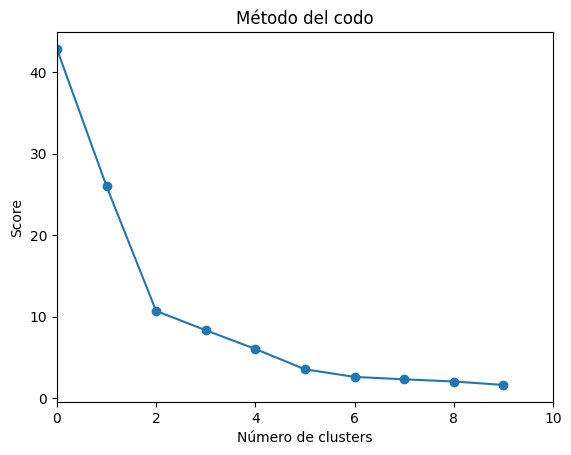

In [ ]:
plt.plot(range(0,10), calculate_WSS(df_cluster_escal, 10), marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.xlim(0,10)
plt.show()

4 clusters es  un punto de inflexión donde la disminución del score se hace menos pronunciada

## Aplicación de KMeans con k=3

In [ ]:
#KMeans con 4 cluster
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df_cluster_escal, 3)
kmeans = pd.DataFrame(clust_labels) #clusters
datas=pd.DataFrame(df_cluster)
datas.columns=df_cluster.columns
datas.insert((df_cluster.shape[1]),'kmeans',kmeans)

In [ ]:
datas.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES,cat_comb,kmeans
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081,7,1
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231,15,2
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211,7,1
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064,5,1
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576,7,1


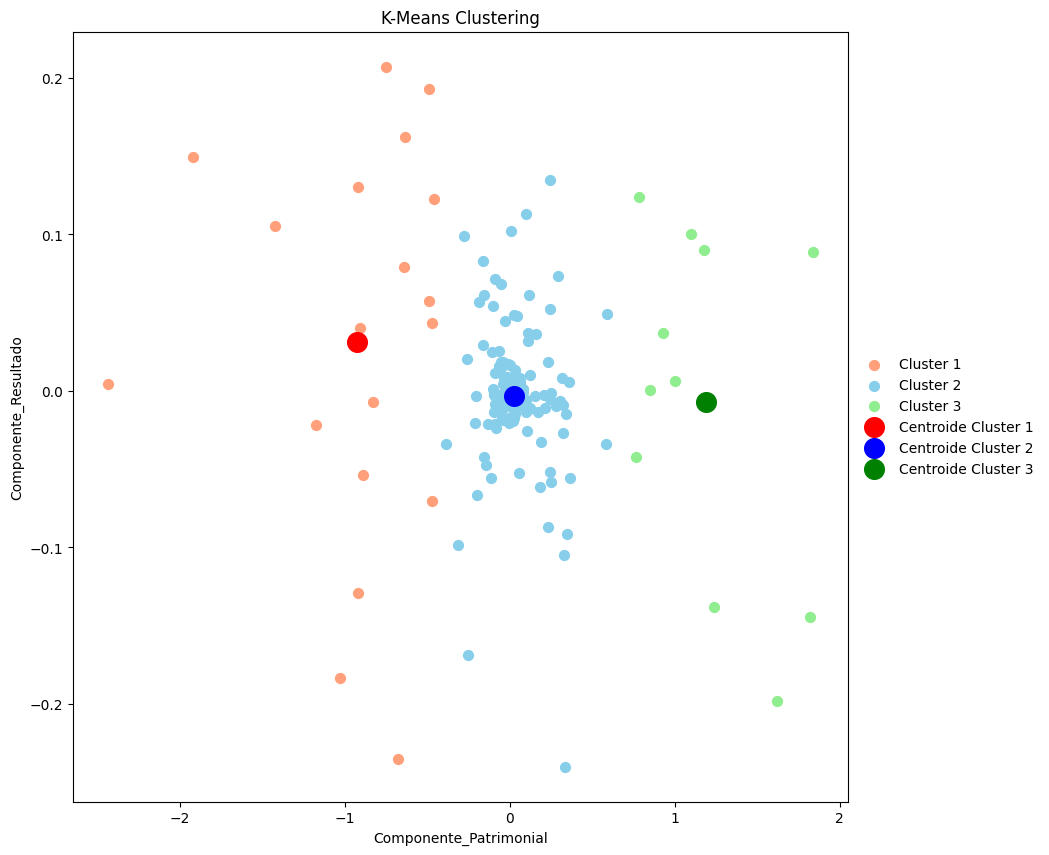

In [ ]:
# Gráfico de clusters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Define colors for each cluster
#colors = ['red', 'blue', 'green', 'grey']

ax.scatter(datas[datas['kmeans']==0]['PC6_PAT'],datas[datas['kmeans']==0]['PC8_RES'],c='lightsalmon',s=50, label='Cluster 1')
ax.scatter(datas[datas['kmeans']==1]['PC6_PAT'],datas[datas['kmeans']==1]['PC8_RES'],c='skyblue',s=50, label='Cluster 2')
ax.scatter(datas[datas['kmeans']==2]['PC6_PAT'],datas[datas['kmeans']==2]['PC8_RES'],c='lightgreen',s=50, label='Cluster 3')
#ax.scatter(datas[datas['kmeans']==3]['PC0_PAT'],datas[datas['kmeans']==3]['PC1_PAT'],c='yellow',s=50, label='Cluster 4')
#ax.scatter(datas[datas['kmeans']==4]['PC0_PAT'],datas[datas['kmeans']==4]['PC1_PAT'],c='lightgrey',s=50, label='Cluster 5')
plt.scatter(cent[:, 0][0], cent[:, 1][0], s=200, c='red', label = 'Centroide Cluster 1')
plt.scatter(cent[:, 0][1], cent[:, 1][1], s=200, c='blue', label = 'Centroide Cluster 2')
plt.scatter(cent[:, 0][2], cent[:, 1][2], s=200, c='green', label = 'Centroide Cluster 3')
#plt.scatter(cent[:, 0][3], cent[:, 1][3], s=200, c='yellow', label = 'Centroide Cluster 4')
#plt.scatter(cent[:, 0][4], cent[:, 1][4], s=200, c='grey', label = 'Centroide Cluster 5')

ax.set_title('K-Means Clustering')
ax.set_xlabel('Componente_Patrimonial')
ax.set_ylabel('Componente_Resultado')

plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

In [ ]:
#Armar la categoria combinada
datas ['cat_comb'] = datas['Entidad NJ'].astype(str) + '_' +  datas['SEGMENTO'].astype(str)+ '_' +  datas['TOP'].astype(str)

In [ ]:
datas.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES,cat_comb,kmeans
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081,0_1_3,1
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231,1_1_3,2
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211,0_1_3,1
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064,0_1_1,1
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576,0_1_3,1


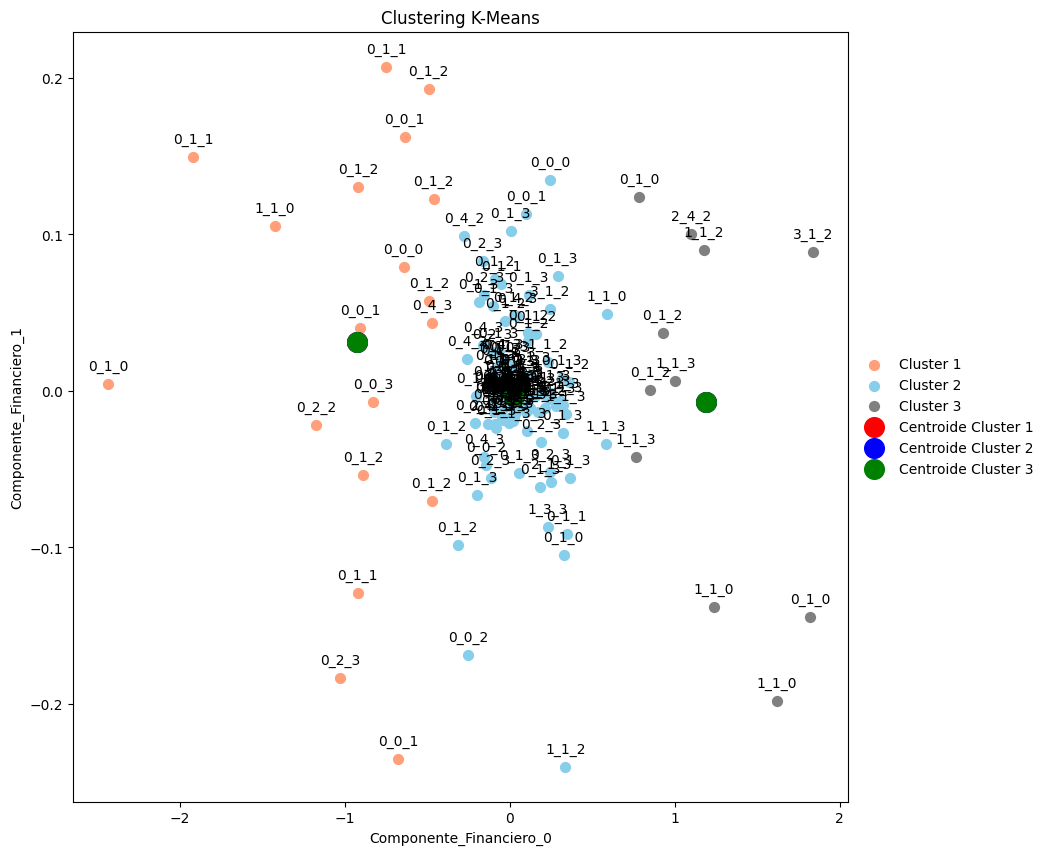

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Extrae los datos de cada cluster según la columna 'label'
# Asegúrate de que 'label' sea el nombre correcto de tu columna de etiquetas
cluster1_data = datas[datas['kmeans'] == 0]
cluster2_data = datas[datas['kmeans'] == 1]
cluster3_data = datas[datas['kmeans'] == 2]
#cluster4_data = datas[datas['kmeans'] == 3]

# Obtén las etiquetas de cada cluster (asumiendo que existe una columna 'your_label_column')
# Reemplaza 'your_label_column' con el nombre real de tu columna de etiquetas

cluster1_labels = cluster1_data['cat_comb']
cluster2_labels = cluster2_data['cat_comb']
cluster3_labels = cluster3_data['cat_comb']


clusters_data = [
    (cluster1_data, cluster1_labels),
    (cluster2_data, cluster2_labels),
    (cluster3_data, cluster3_labels)
]

# Crea el gráfico de dispersión
fig, ax = plt.subplots(figsize=(10, 10))

# Define los colores para cada cluster
colores = ['lightsalmon', 'skyblue', 'grey']

# Iterar sobre los clusters y agregarlos al gráfico
for i, (data, labels) in enumerate(clusters_data):
    ax.scatter(
        data['PC6_PAT'],
        data['PC8_RES'],
        c=colores[i],
        s=50,
        label=f'Cluster {i+1}'  # Usar f-strings para formatear la etiqueta
    )

    # Agregar etiquetas a los puntos
    for j, (x, y, label) in enumerate(zip(data['PC6_PAT'], data['PC8_RES'], labels)):
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')


# Grafica los centroides (asumiendo que 'cent' es un array NumPy con los centroides)
ax.scatter(cent[:, 0], cent[:, 1], s=200, c='red', label='Centroide Cluster 1')
ax.scatter(cent[:, 0], cent[:, 1], s=200, c='blue', label='Centroide Cluster 2')
ax.scatter(cent[:, 0], cent[:, 1], s=200, c='green', label='Centroide Cluster 3')
#ax.scatter(cent[:, 0], cent[:, 1], s=200, c='yellow', label='Centroide Cluster 4')

# Personaliza el gráfico
ax.set_title('Clustering K-Means')
ax.set_xlabel('Componente_Financiero_0')
ax.set_ylabel('Componente_Financiero_1')
plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

In [ ]:
datas.head()

#MANOVA

## Armado dataframe

In [ ]:
datas.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES,cat_comb,kmeans
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081,0_1_3,1
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231,1_1_3,2
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211,0_1_3,1
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064,0_1_1,1
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576,0_1_3,1


In [ ]:
extraer_orginal = [0,1,3,4,5,19,20]
df_manova = df_original.iloc[:,extraer_orginal]
df_manova['PC0_PAT'] = principal_components_pat["PC0"]
df_manova['PC6_PAT'] = principal_components_pat["PC6"]
df_manova['PC0_RES'] = principal_components_res["PC0"]
df_manova['PC8_RES'] = principal_components_res["PC8"]
df_manova ['cat_comb']= datas['cat_comb']
df_manova ['kmeans']= datas['kmeans']
df_manova.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC0_PAT,PC6_PAT,PC0_RES,PC8_RES,cat_comb,kmeans
0,1,A,PM,92,RESTO,0.0936,40.0,-1.025969,-0.103219,-0.954882,0.001081,0_1_3,1
1,2,C,PM,113,RESTO,0.0599,5180.0,0.273398,0.762093,-0.683769,-0.042231,1_1_3,2
2,3,A,PM,121,RESTO,0.0487,75.0,-0.972010,0.026740,-1.015610,-0.017211,0_1_3,1
3,4,A,PM,11,20,3.0154,2879.0,5.219417,-0.051717,5.953206,0.068064,0_1_1,1
4,5,A,PM,123,RESTO,0.0478,2229.0,-0.811180,0.277222,-0.976901,-0.009576,0_1_3,1


In [ ]:
#LIBRERIAS
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA


In [ ]:
df_manova = df_manova.rename(columns={'Entidad NJ': 'Tipo',
                                            'SEGMENTO': 'Segmento',
                                            'TOP': 'Top_Categoria',
                                           'CantidaddeJuicios ':'Juicios' })
df_manova.head()

,Entidad N,Tipo,Segmento,Rank,Top_Categoria,%ProduccionTotal,Juicios,PC0_PAT,PC6_PAT,PC0_RES,PC8_RES,cat_comb,kmeans
0,1,A,PM,92,RESTO,0.0936,40.0,-1.025969,-0.103219,-0.954882,0.001081,0_1_3,1
1,2,C,PM,113,RESTO,0.0599,5180.0,0.273398,0.762093,-0.683769,-0.042231,1_1_3,2
2,3,A,PM,121,RESTO,0.0487,75.0,-0.972010,0.026740,-1.015610,-0.017211,0_1_3,1
3,4,A,PM,11,20,3.0154,2879.0,5.219417,-0.051717,5.953206,0.068064,0_1_1,1
4,5,A,PM,123,RESTO,0.0478,2229.0,-0.811180,0.277222,-0.976901,-0.009576,0_1_3,1


## Modelo Manova Variables Principales

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC0_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2692 2.0000 179.0000 243.0007 0.0000
         Pillai's trace 0.7308 2.0000 179.0000 243.0007 0.0000
 Hotelling-Lawley trace 2.7151 2.0000 179.0000 243.0007 0.0000
    Roy's greatest root 2.7151 2.0000 179.0000 243.0007 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9038 6.0000 358.0000  3.0942 0.0058
          Pillai's trace 0.0977 6.0000 360.0000  3.0807 0.0059
  Hotelling

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC0_RES ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2050 2.0000 179.0000 347.1096 0.0000
         Pillai's trace 0.7950 2.0000 179.0000 347.1096 0.0000
 Hotelling-Lawley trace 3.8783 2.0000 179.0000 347.1096 0.0000
    Roy's greatest root 3.8783 2.0000 179.0000 347.1096 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9416 6.0000 358.0000  1.8238 0.0935
          Pillai's trace 0.0586 6.0000 360.0000  1.8112 0.0959
  Hotelling

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC0_RES + PC0_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1973 3.0000 178.0000 241.4316 0.0000
         Pillai's trace 0.8027 3.0000 178.0000 241.4316 0.0000
 Hotelling-Lawley trace 4.0691 3.0000 178.0000 241.4316 0.0000
    Roy's greatest root 4.0691 3.0000 178.0000 241.4316 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.7611 9.0000 433.3558  5.7167 0.0000
          Pillai's trace 0.2503 9.0000 540.0000  5.4608 0.0000
  Hotelling

In [ ]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import numpy as np

# Obtener los resultados del MANOVA
md = MANOVA.from_formula('Juicios + PC0_RES + PC0_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)
results = md.mv_test()


In [ ]:
print(results)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1973 3.0000 178.0000 241.4316 0.0000
         Pillai's trace 0.8027 3.0000 178.0000 241.4316 0.0000
 Hotelling-Lawley trace 4.0691 3.0000 178.0000 241.4316 0.0000
    Roy's greatest root 4.0691 3.0000 178.0000 241.4316 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.7611 9.0000 433.3558  5.7167 0.0000
          Pillai's trace 0.2503 9.0000 540.0000  5.4608 0.0000
  Hotelling

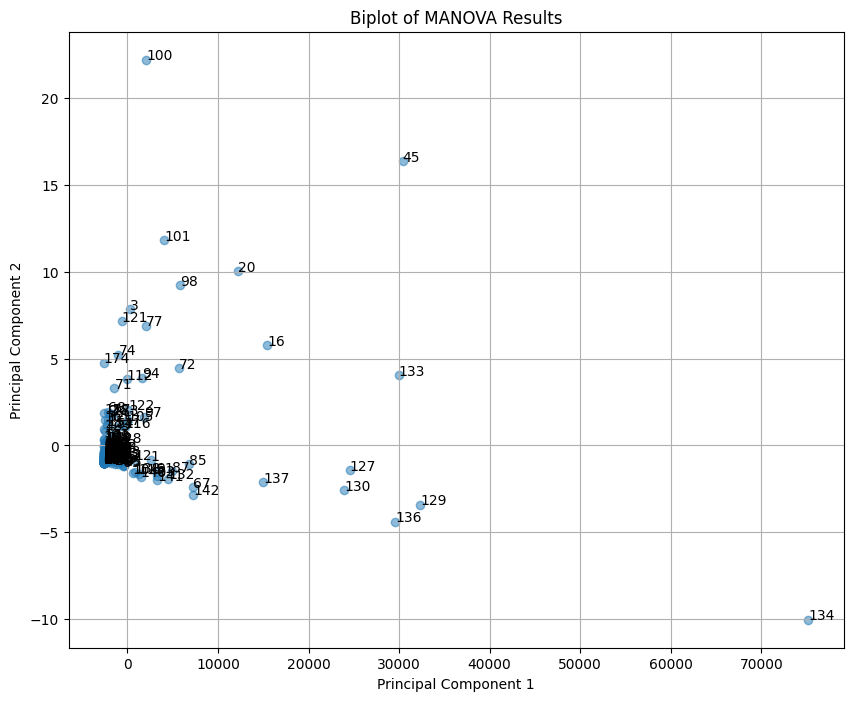

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from sklearn.decomposition import PCA

# Extract the dependent variables
dependent_vars = df_manova[['Juicios', 'PC0_RES', 'PC0_PAT']]

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
components = pca.fit_transform(dependent_vars)

# Create the biplot
plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5)

# Add labels for each data point (optional)
for i, txt in enumerate(df_manova.index):
    plt.annotate(txt, (components[i, 0], components[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of MANOVA Results')
plt.grid(True)
plt.show()

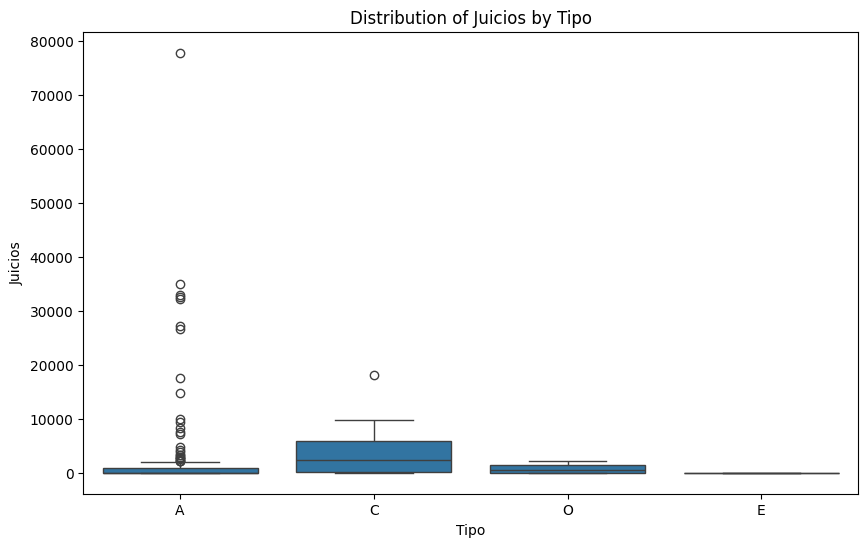

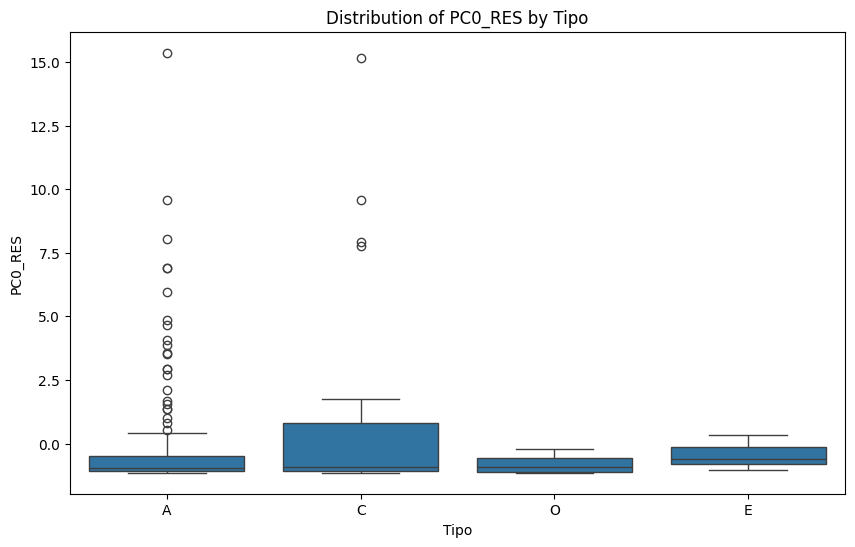

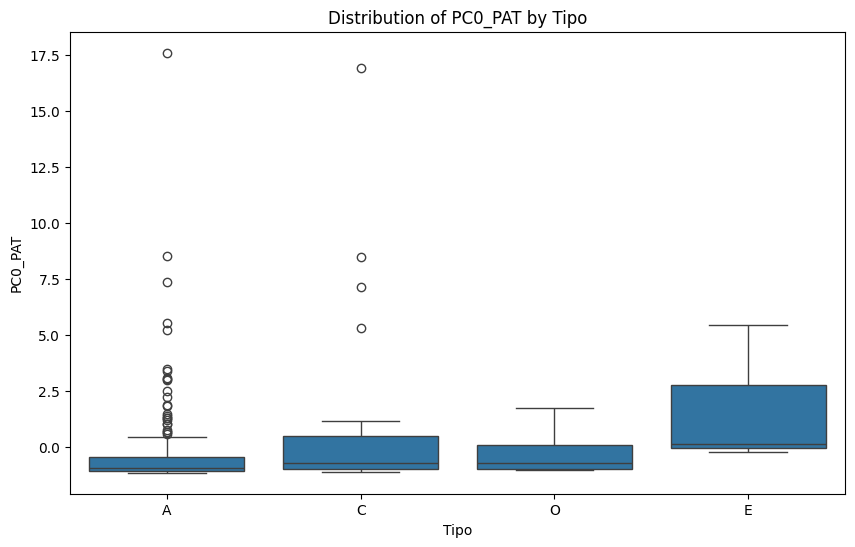

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC0_RES', 'PC0_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tipo', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Tipo')
    plt.show()



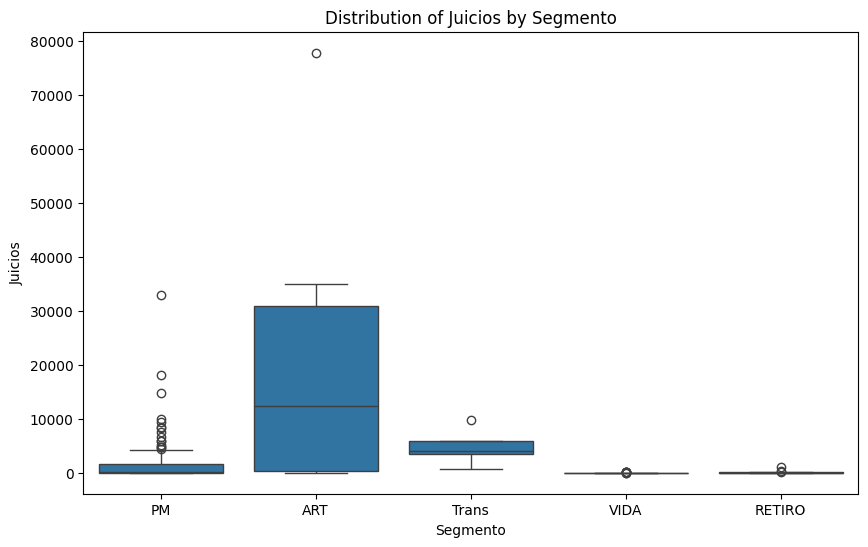

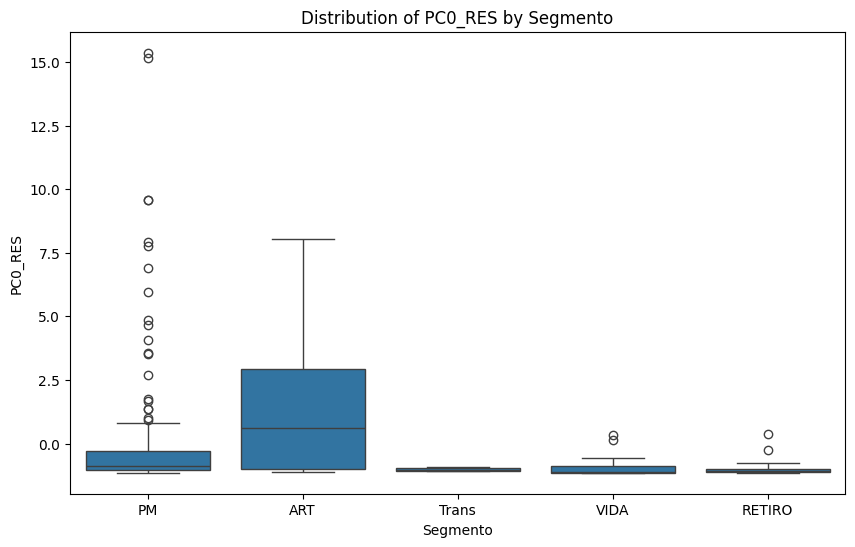

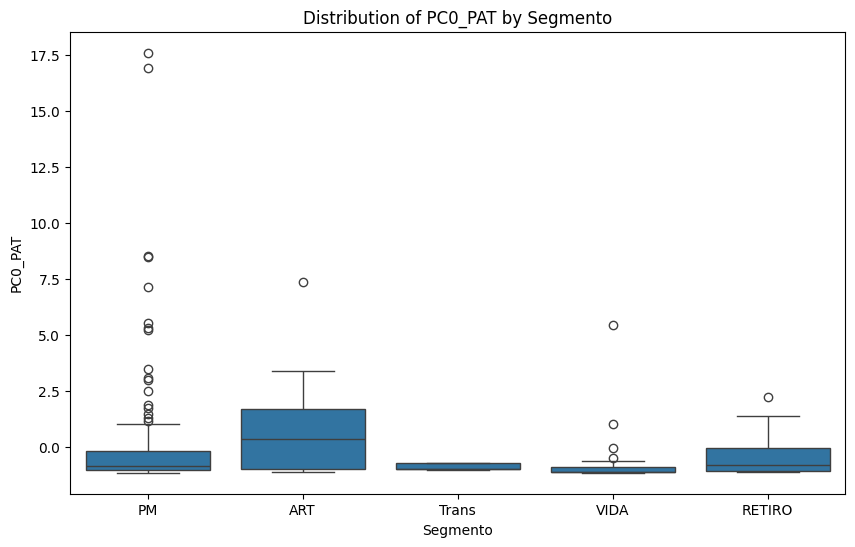

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC0_RES', 'PC0_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segmento', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Segmento')
    plt.show()

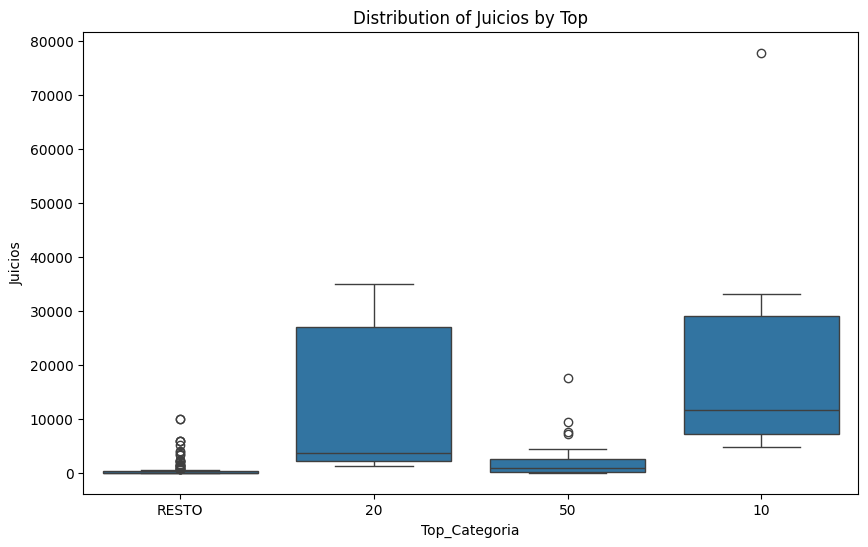

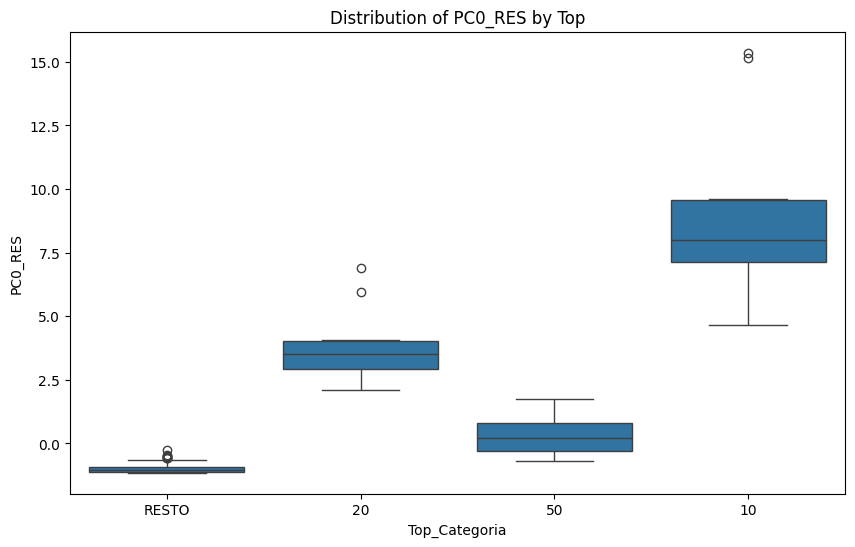

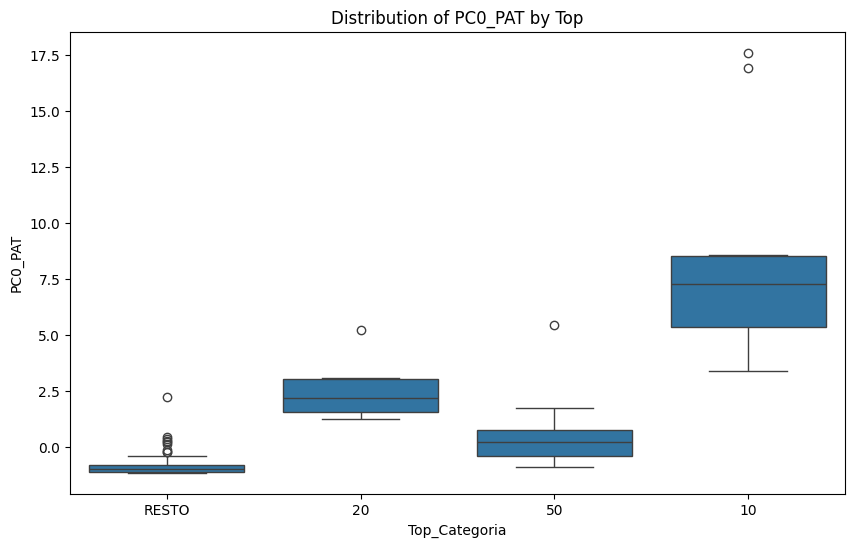

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC0_RES', 'PC0_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Top_Categoria', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Top')
    plt.show()

## Modelo Manova Variables Optimas

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC6_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4256 2.0000 179.0000 120.7761 0.0000
         Pillai's trace 0.5744 2.0000 179.0000 120.7761 0.0000
 Hotelling-Lawley trace 1.3495 2.0000 179.0000 120.7761 0.0000
    Roy's greatest root 1.3495 2.0000 179.0000 120.7761 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8627 6.0000 358.0000  4.5740 0.0002
          Pillai's trace 0.1387 6.0000 360.0000  4.4695 0.0002
  Hotelling

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC8_RES ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4370 2.0000 179.0000 115.2996 0.0000
         Pillai's trace 0.5630 2.0000 179.0000 115.2996 0.0000
 Hotelling-Lawley trace 1.2883 2.0000 179.0000 115.2996 0.0000
    Roy's greatest root 1.2883 2.0000 179.0000 115.2996 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9537 6.0000 358.0000  1.4300 0.2020
          Pillai's trace 0.0464 6.0000 360.0000  1.4255 0.2037
  Hotelling

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC8_RES + PC6_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.4255 3.0000 178.0000 80.0963 0.0000
          Pillai's trace 0.5745 3.0000 178.0000 80.0963 0.0000
  Hotelling-Lawley trace 1.3499 3.0000 178.0000 80.0963 0.0000
     Roy's greatest root 1.3499 3.0000 178.0000 80.0963 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8497 9.0000 433.3558  3.3318 0.0006
          Pillai's trace 0.1535 9.0000 540.0000  3.2354 0.0008
  Hotelling

In [ ]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import numpy as np

# Obtener los resultados del MANOVA
md = MANOVA.from_formula('Juicios + PC8_RES + PC6_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)
results = md.mv_test()


In [ ]:
print(results)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.4255 3.0000 178.0000 80.0963 0.0000
          Pillai's trace 0.5745 3.0000 178.0000 80.0963 0.0000
  Hotelling-Lawley trace 1.3499 3.0000 178.0000 80.0963 0.0000
     Roy's greatest root 1.3499 3.0000 178.0000 80.0963 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8497 9.0000 433.3558  3.3318 0.0006
          Pillai's trace 0.1535 9.0000 540.0000  3.2354 0.0008
  Hotelling

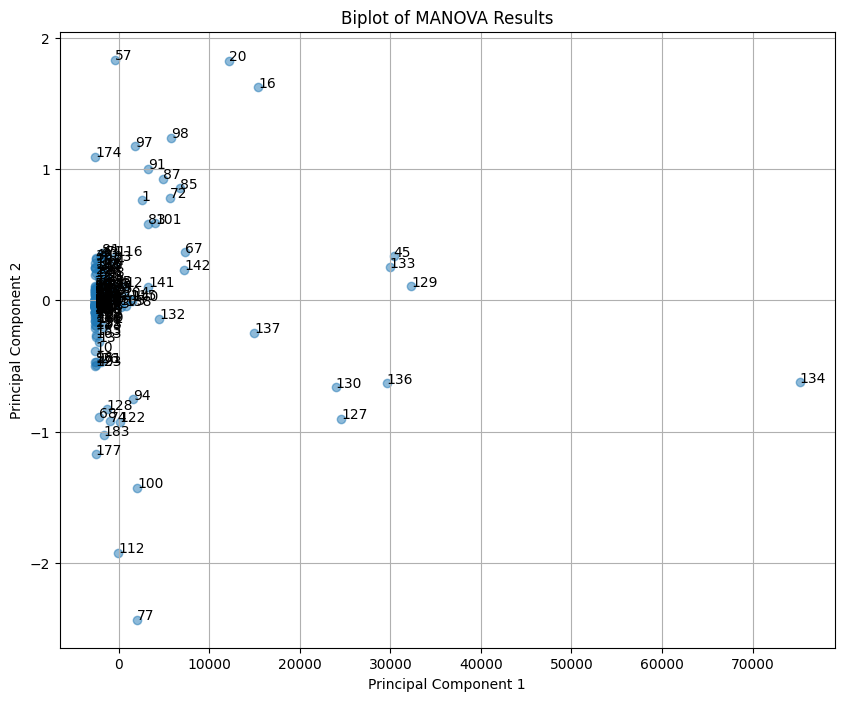

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from sklearn.decomposition import PCA

# Extract the dependent variables
dependent_vars = df_manova[['Juicios', 'PC8_RES', 'PC6_PAT']]

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
components = pca.fit_transform(dependent_vars)

# Create the biplot
plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5)

# Add labels for each data point (optional)
for i, txt in enumerate(df_manova.index):
    plt.annotate(txt, (components[i, 0], components[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of MANOVA Results')
plt.grid(True)
plt.show()

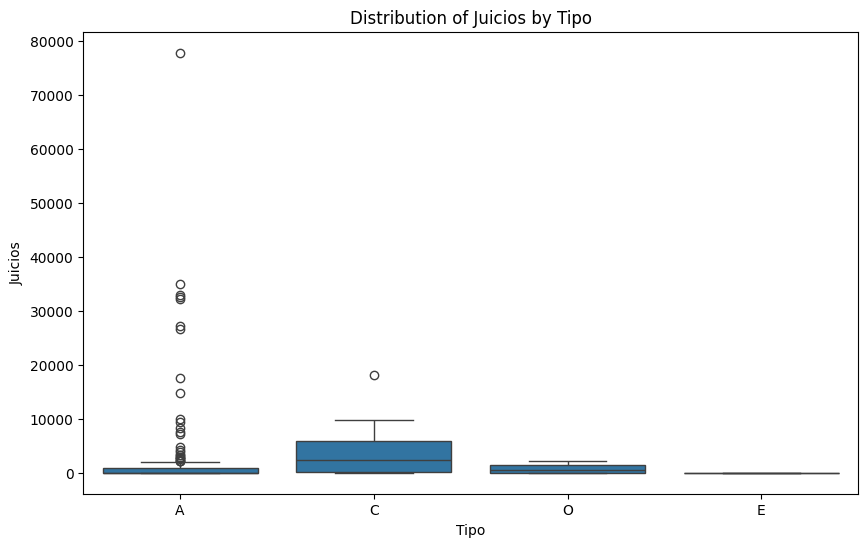

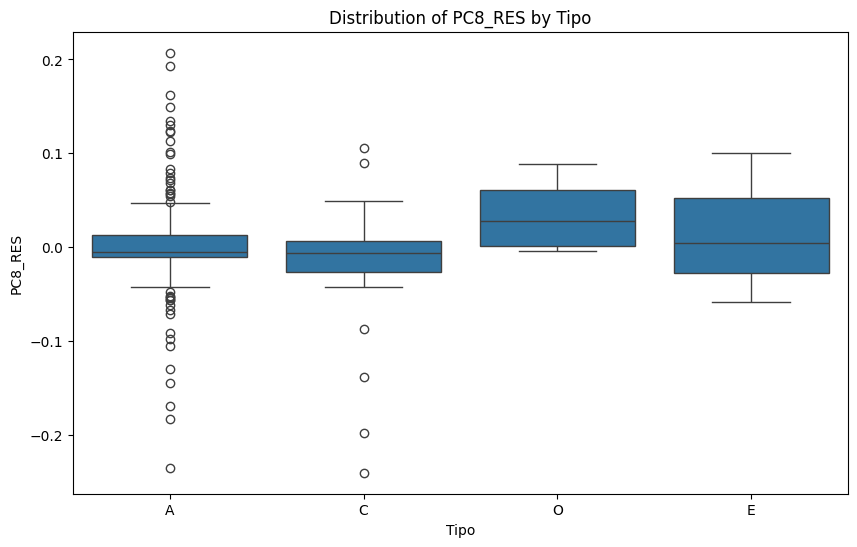

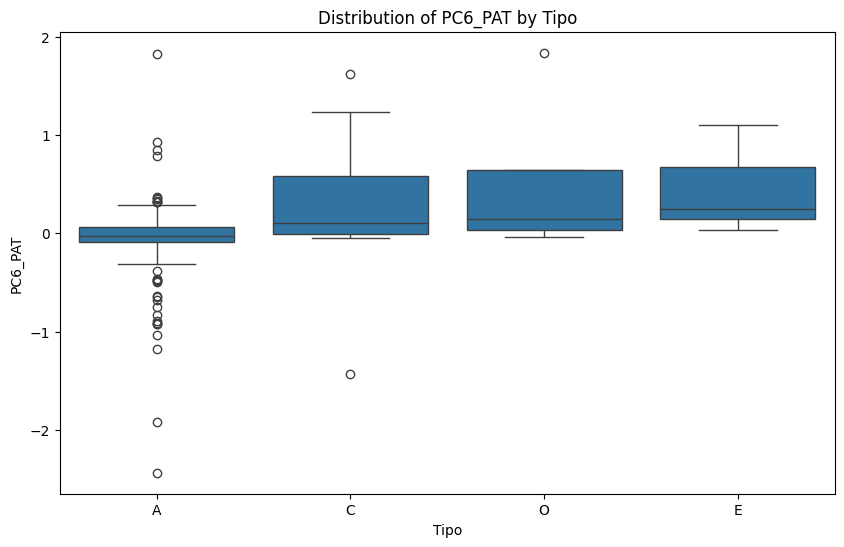

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC8_RES', 'PC6_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tipo', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Tipo')
    plt.show()



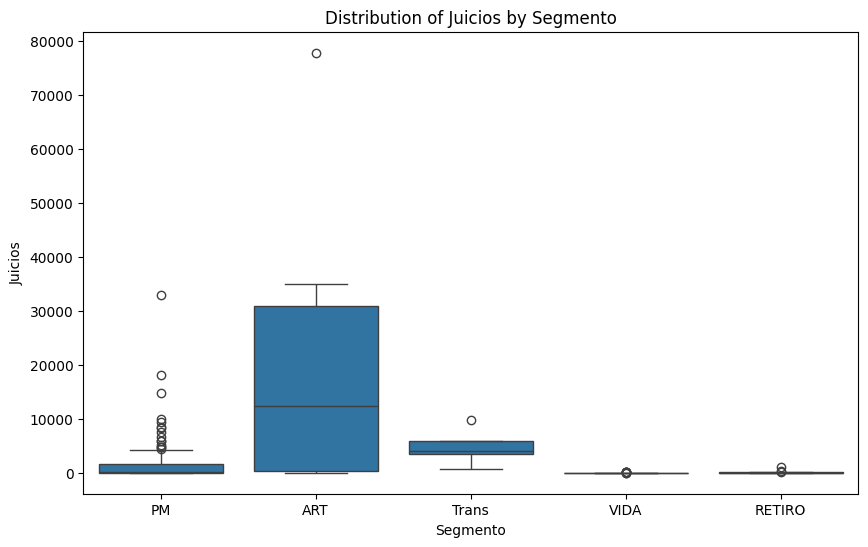

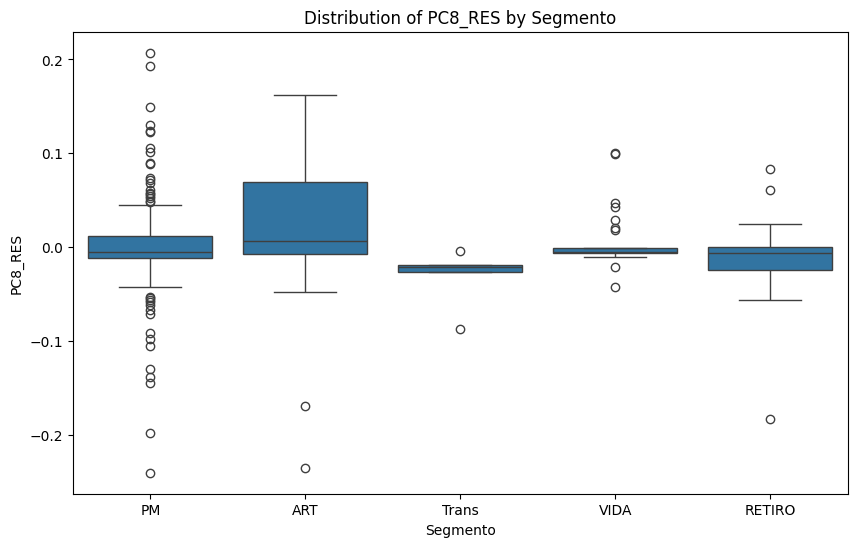

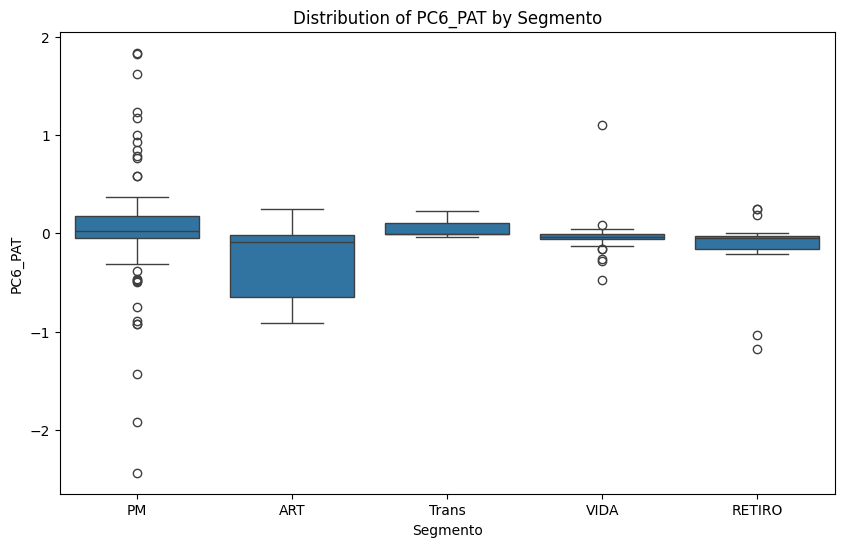

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC8_RES', 'PC6_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segmento', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Segmento')
    plt.show()

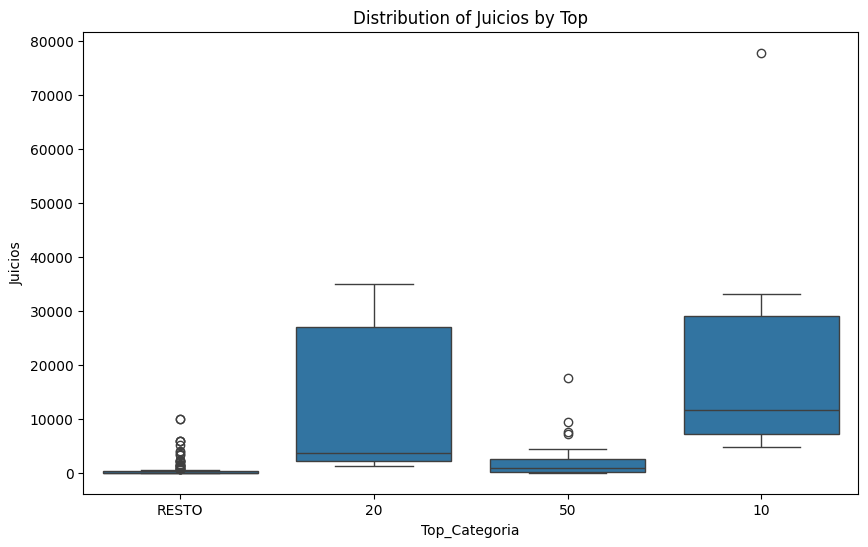

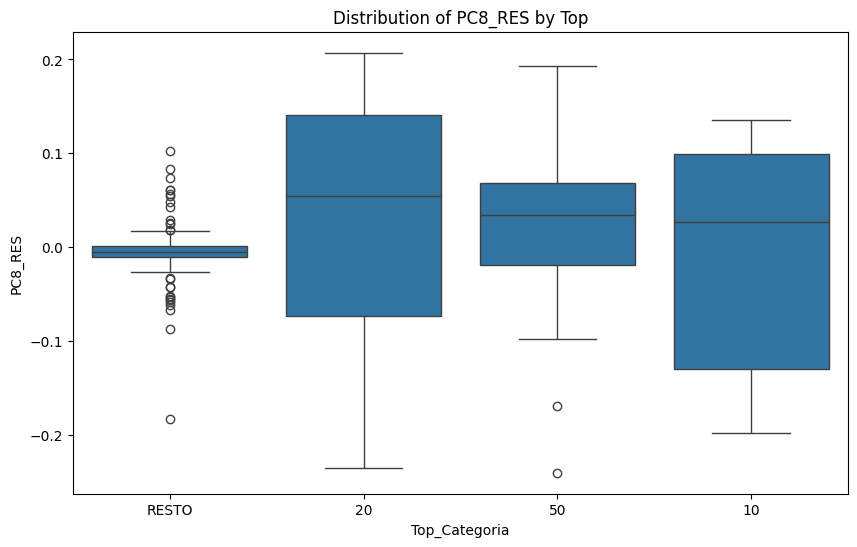

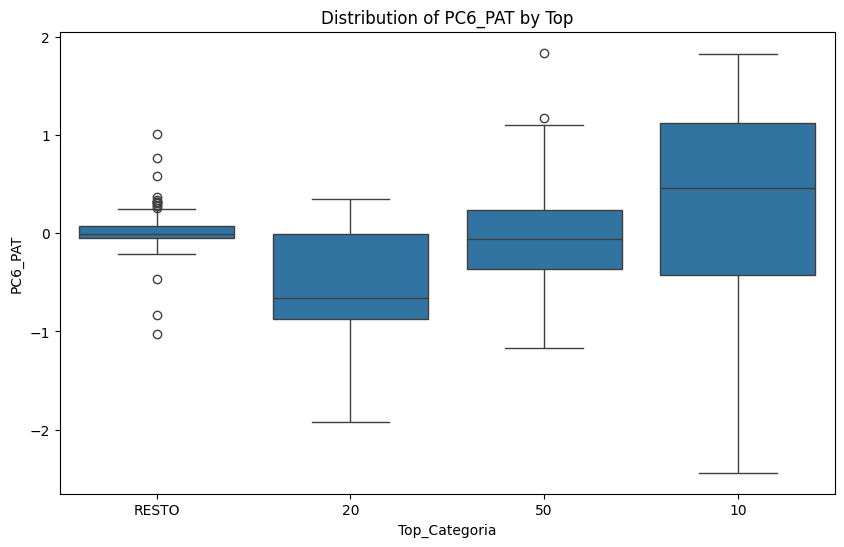

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC8_RES', 'PC6_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Top_Categoria', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Top')
    plt.show()

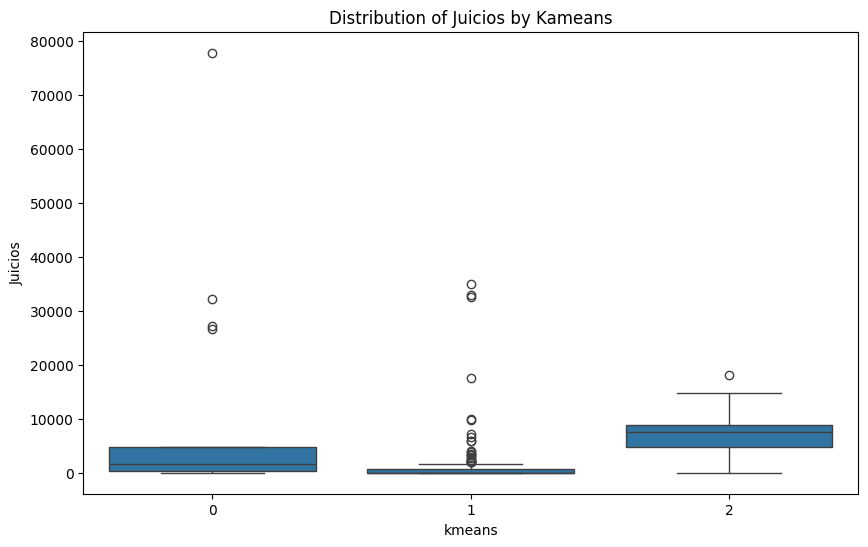

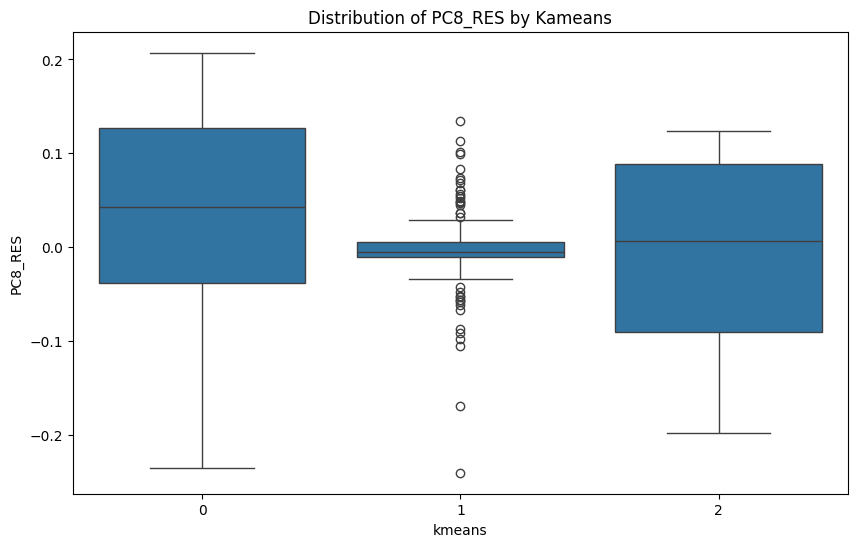

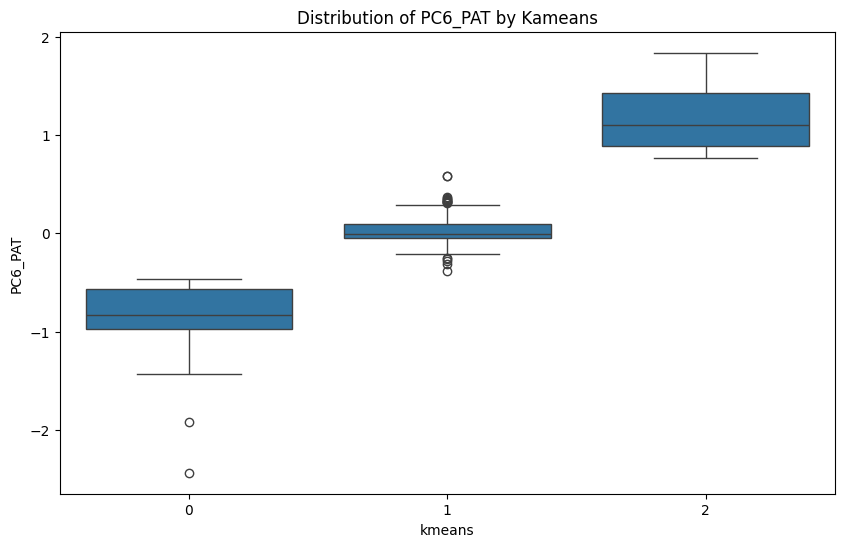

In [ ]:
import seaborn as sns #Pendiente el gráfico  con los kmeeans tambien
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC8_RES', 'PC6_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='kmeans', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Kameans')
    plt.show()